# Apartments Project - Price Prediction and Classification

Load all the necessary libraries

In [ ]:
#!pip install ydata_profiling

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from prettytable import PrettyTable
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from prettytable import PrettyTable
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from scipy.stats import randint
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from ydata_profiling import ProfileReport

# Import the Data and get a glimpse

In [5]:
df = pd.read_csv('apartmentsUSA.csv',sep=";", encoding='cp1252')

# Lets see the first rows of the dataset
df.head()

id                category                            title  \
0  5668640009  housing/rent/apartment       One BR 507 & 509 Esplanade   
1  5668639818  housing/rent/apartment      Three BR 146 Lochview Drive   
2  5668639686  housing/rent/apartment  Three BR 3101 Morningside Drive   
3  5668639659  housing/rent/apartment            Two BR 209 Aegean Way   
4  5668639374  housing/rent/apartment         One BR 4805 Marquette NE   

                                                body amenities  bathrooms  \
0  This unit is located at 507 & 509 Esplanade, R...       NaN        1.0   
1  This unit is located at 146 Lochview Drive, Ne...       NaN        1.5   
2  This unit is located at 3101 Morningside Drive...       NaN        2.0   
3  This unit is located at 209 Aegean Way, Vacavi...       NaN        1.0   
4  This unit is located at 4805 Marquette NE, Alb...       NaN        1.0   

   bedrooms currency fee  has_photo  ... price_display  price_type  \
0       1.0      USD  No  Thumbnail  ...        $2,195     Monthly   
1       3.0      USD  No  Thumbnail  ...        $1,250     Monthly   
2       3.0      USD  No  Thumbnail  ...        $1,395     Monthly   
3       2.0      USD  No  Thumbnail  ...        $1,600     Monthly   
4       1.0      USD  No  Thumbnail  ...          $975     Monthly   

  square_feet              address       cityname state latitude longitude  \
0         542   507  509 Esplanade  Redondo Beach    CA  33.8520 -118.3759   
1        1500      146 Lochview Dr   Newport News    VA  37.0867  -76.4941   
2        1650  3101 Morningside Dr        Raleigh    NC  35.8230  -78.6438   
3         820       209 Aegean Way      Vacaville    CA  38.3622 -121.9712   
4         624    4805 Marquette NE    Albuquerque    NM  35.1038 -106.6110   

      source        time  
0  RentLingo  1577360355  
1  RentLingo  1577360340  
2  RentLingo  1577360332  
3  RentLingo  1577360330  
4  RentLingo  1577360308  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

Check for missing values percentages.

In [ ]:
df.isnull().sum()/df.shape[0]*100

id                0.000000
category          0.000000
title             0.000000
body              0.000000
amenities        16.125920
bathrooms         0.063322
bedrooms          0.124633
currency          0.000000
fee               0.000000
has_photo         0.000000
pets_allowed     60.732521
price             0.001005
price_display     0.001005
price_type        0.000000
square_feet       0.000000
address          92.016444
cityname          0.303542
state             0.303542
latitude          0.025128
longitude         0.025128
source            0.000000
time              0.000000
dtype: float64

Check the categorical variables for class imbalance and if some columns can be dropped.

In [ ]:
for col in df.select_dtypes(include='object'):
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())



Value counts for 'category':
category
housing/rent/apartment            99431
housing/rent/commercial/retail       42
housing/rent                          7
housing/rent/short_term               4
housing/rent/home                     4
housing/rent/condo                    3
housing/rent/other                    1
Name: count, dtype: int64

Value counts for 'title':
title
Apartment in great location                                                  1064
Apartment in prime location                                                  1028
Apartment in quiet area, spacious with big kitchen                           1023
Super Cute! Apartment for Rent!                                              1018
This Apartment is a must see!                                                1002
                                                                             ... 
Three BR Apartment - Located in the heart of on vibrant Abbot Kinney.           1
Bellevue, Great Location, Two BR Apartment.     

We can see that variables like **address** (too many missing values) , **body** (requires NLP methods to have value), category (we are focusing on apartments), **id, source, time, price type**(completely unbalanced), **price display, currency** (All USD), **source and title** (again NLP) have no meaning to be in this dataset either because they are completely imbalanced or usless for our analysis.

We are going to make a copy of this dataframe and we are going to work with that for the rest of the project leaving the initial dataframe untouched.

In [6]:
listings = df.copy()

In [7]:
listings.shape

(99492, 22)

In [8]:
#Now lets get rid of the columns we mentioned earlier.
listings = listings.drop(columns=['address','id', 'source', 'time', 'price_type','price_display','title','body','currency','fee','category','cityname'])

#Also drop duplicates
listings = listings.drop_duplicates()

In [9]:
listings.shape

(91945, 10)

In [10]:
listings.head()

amenities  bathrooms  bedrooms  has_photo pets_allowed   price  square_feet  \
0       NaN        1.0       1.0  Thumbnail         Cats  2195.0          542   
1       NaN        1.5       3.0  Thumbnail    Cats,Dogs  1250.0         1500   
2       NaN        2.0       3.0  Thumbnail          NaN  1395.0         1650   
3       NaN        1.0       2.0  Thumbnail    Cats,Dogs  1600.0          820   
4       NaN        1.0       1.0  Thumbnail    Cats,Dogs   975.0          624   

  state  latitude  longitude  
0    CA   33.8520  -118.3759  
1    VA   37.0867   -76.4941  
2    NC   35.8230   -78.6438  
3    CA   38.3622  -121.9712  
4    NM   35.1038  -106.6110

In [11]:
#We saw earlier that there is a just a missing price value. We are going to impute the median for this price.
listings['price'] = listings['price'].fillna(listings['price'].median())

#Let's confirm its fixed
listings.isnull().sum()

amenities       15198
bathrooms          63
bedrooms          117
has_photo           0
pets_allowed    55609
price               0
square_feet         0
state             271
latitude           25
longitude          25
dtype: int64

In [12]:
#As we saw before there are a lot of states. Some of them have very few listings though so we will group them in a new group called 'Other'.

value_counts = listings['state'].value_counts()

rare_categories = value_counts[value_counts < 100].index

listings['state'] = listings['state'].apply(lambda x: 'other' if x in rare_categories else x)

In [13]:
#Lets set the datatypes as well so we can work better
listings = listings.astype({
    'amenities':'string',
    'bathrooms':'float64',
    'bedrooms':'float64',
    'has_photo':'string',
    'pets_allowed':'string',
    'price':'float64',
    'square_feet':'int64',
    'state':'string',
    'latitude':'float64',
    'longitude':'float64'
})


In [14]:
#Since there are also a lot of missing values in amenities column we will fill them with "Not available amenities" and the missing states with "missing".
listings['amenities'] = listings['amenities'].fillna('not available')
listings['state'] = listings['state'].fillna('missing')

In [15]:
#Lets deal with the pets_allowed column now
listings['pets_allowed'].value_counts()

pets_allowed
Cats,Dogs         34425
Cats               1784
Dogs                126
Cats,Dogs,None        1
Name: count, dtype: Int64

In [16]:
listings['pets_allowed'] = listings['pets_allowed'].astype(str).apply(
    lambda x: "Pets_Allowed" if any(p in x for p in ["Cats", "Dogs"]) and "None" not in x else "None"
)

In [17]:
listings['pets_allowed'].value_counts()

pets_allowed
None            55610
Pets_Allowed    36335
Name: count, dtype: int64

Optional: Creation of data frame (listings) profile report.

In [ ]:
report = ProfileReport(listings)
report.to_file("report_listings.html")

# Exploratory Data Analysis

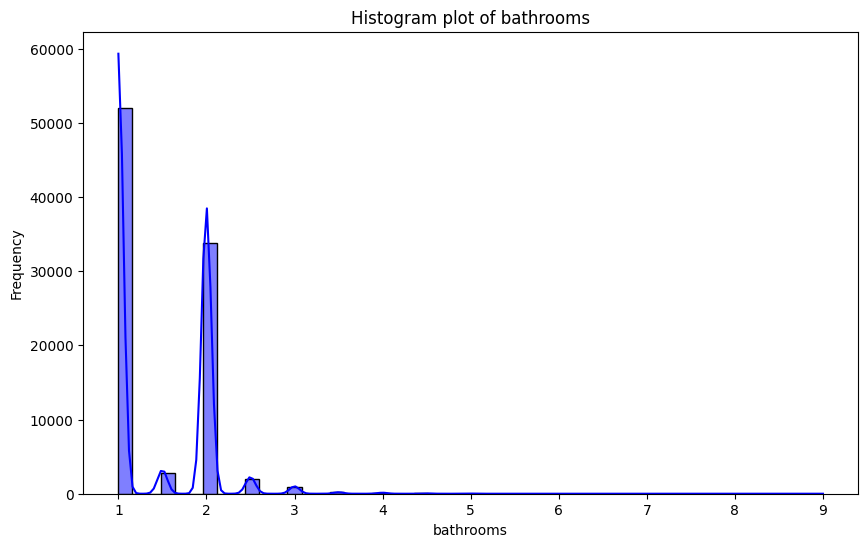

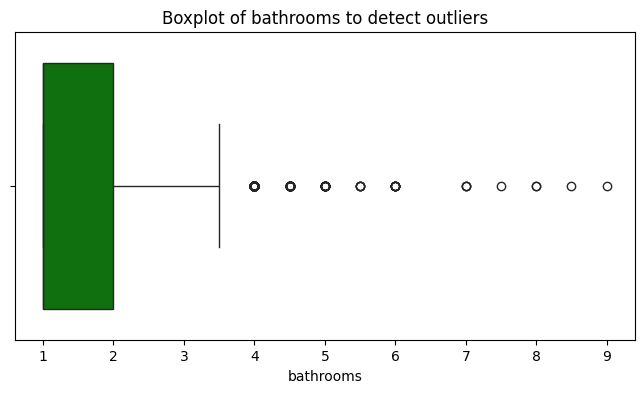

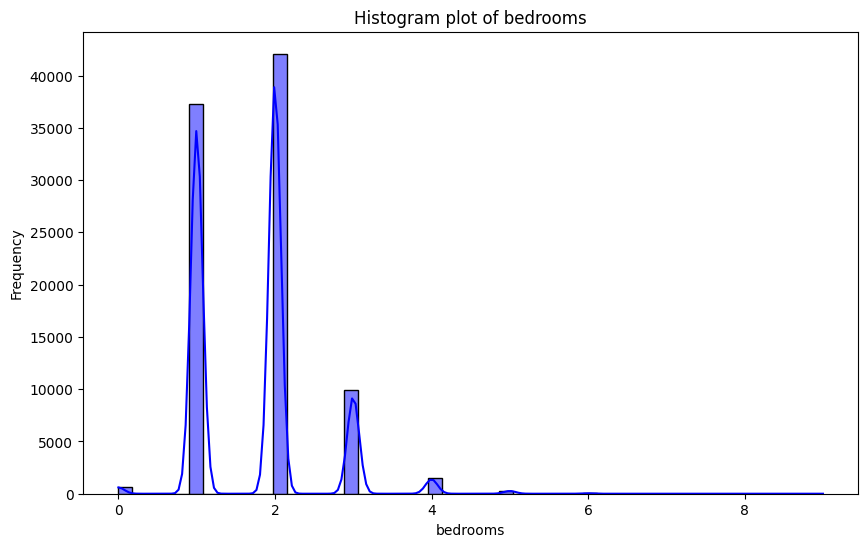

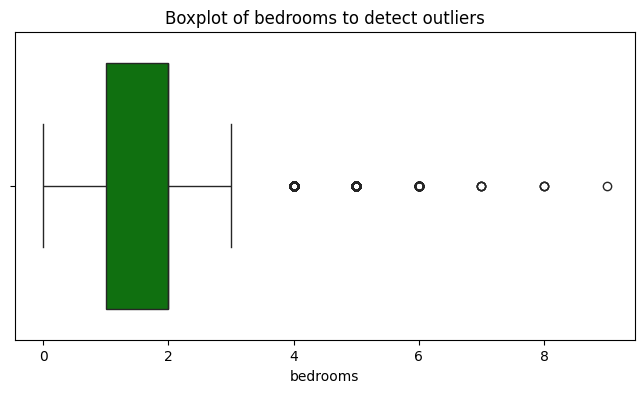

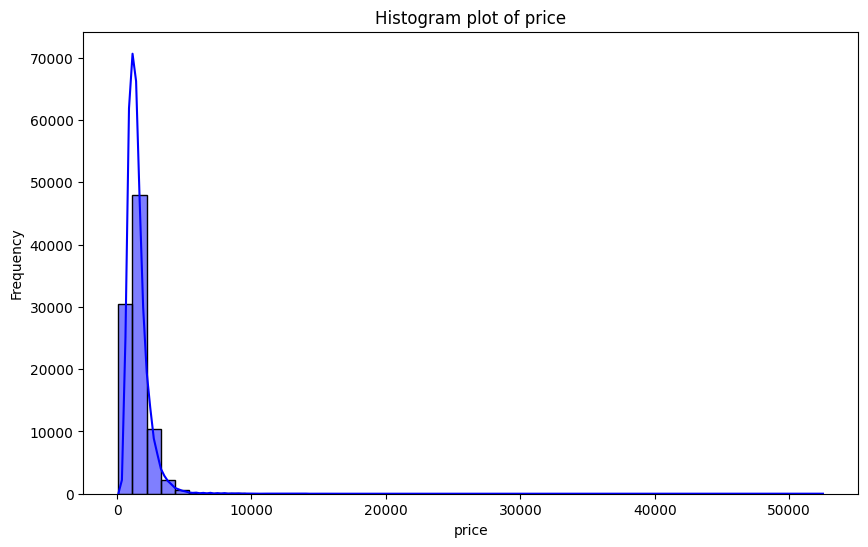

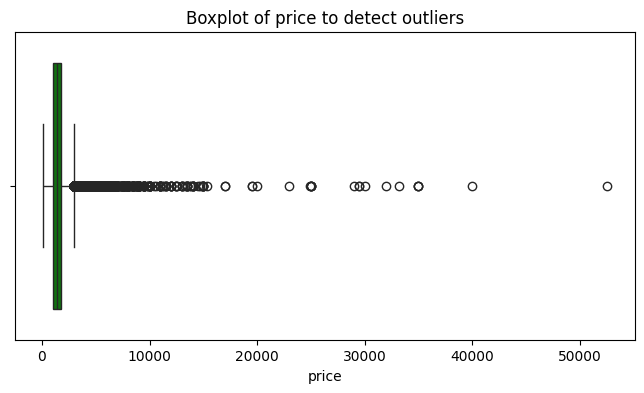

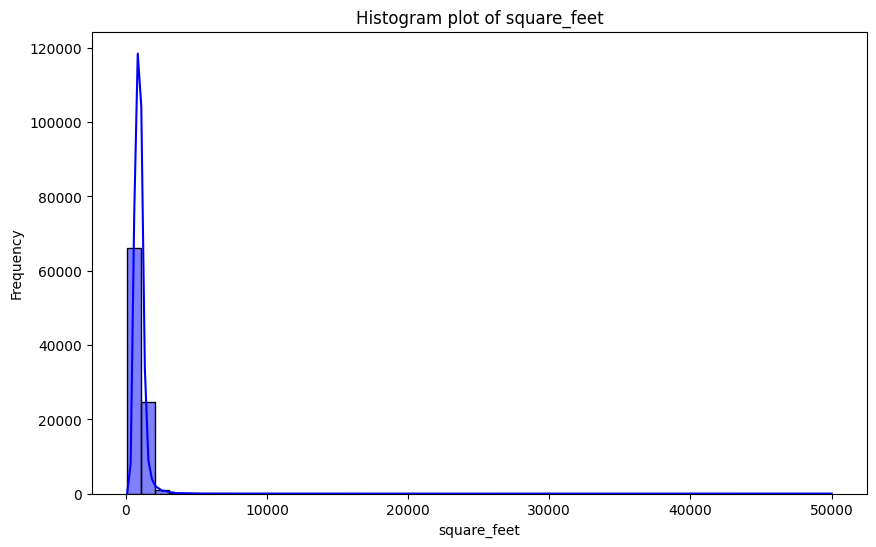

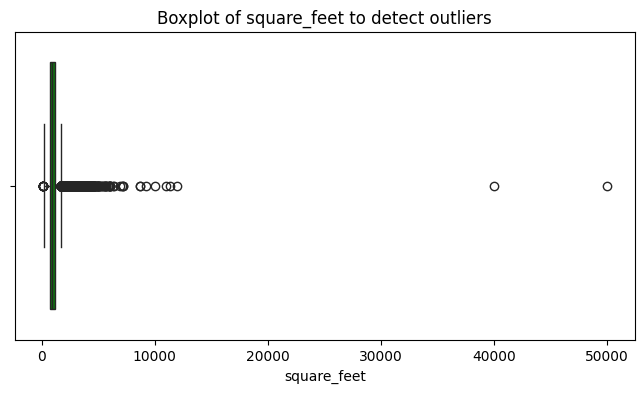

In [ ]:
numerical_col = ['bathrooms','bedrooms','price','square_feet']

for col in numerical_col:
    plt.figure(figsize=(10,6))
    sns.histplot(listings[col], kde=True, bins=50, color='blue')
    plt.title(f"Histogram plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.boxplot(x=listings[col], color='green')
    plt.title(f"Boxplot of {col} to detect outliers")
    plt.xlabel(col)
    plt.show()


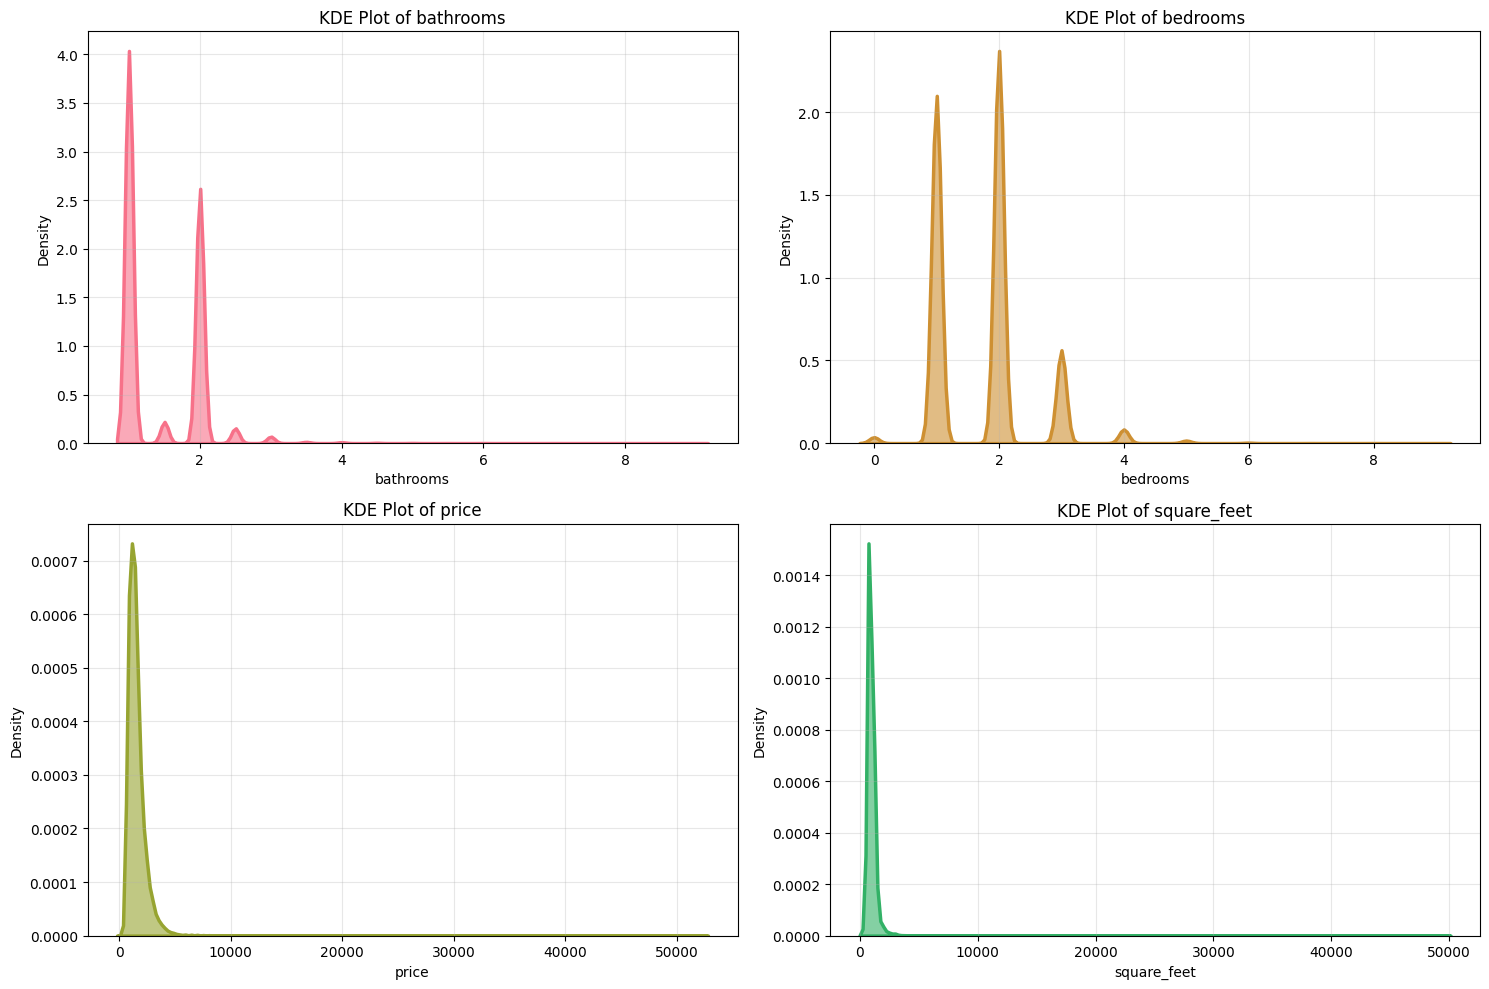

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_col, 1):
    plt.subplot(2, 2, i)
    sns.kdeplot(
        data=listings,
        x=feature,
        fill=True,
        alpha=0.6,
        linewidth=2.5,
        color=sns.color_palette("husl", 8)[i-1]
    )
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

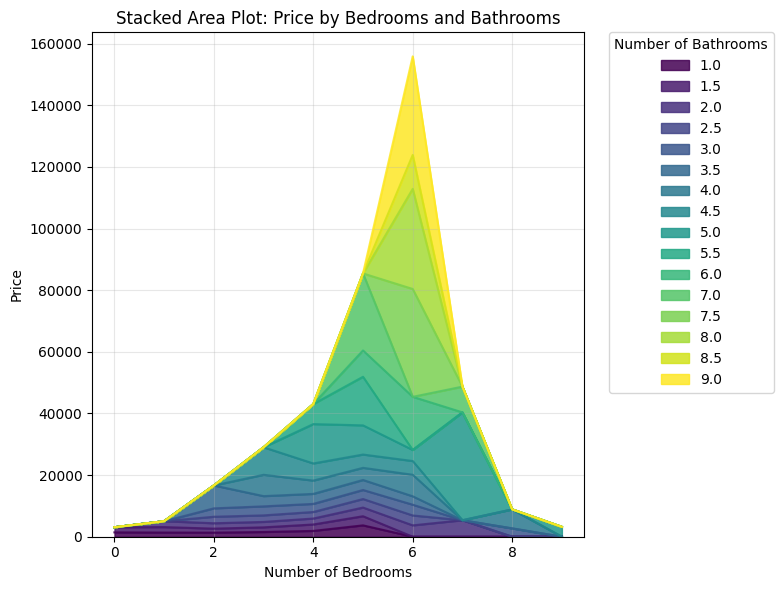

In [ ]:
grouped = listings.groupby(['bedrooms', 'bathrooms'])['price'].mean().unstack().fillna(0)
grouped = grouped.sort_index()

fig, ax = plt.subplots(figsize=(8, 6))

grouped.plot(kind='area', stacked=True, colormap='viridis', alpha=0.85, ax=ax)

ax.set_title('Stacked Area Plot: Price by Bedrooms and Bathrooms')
ax.set_xlabel('Number of Bedrooms')
ax.set_ylabel('Price')

ax.legend(title='Number of Bathrooms', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

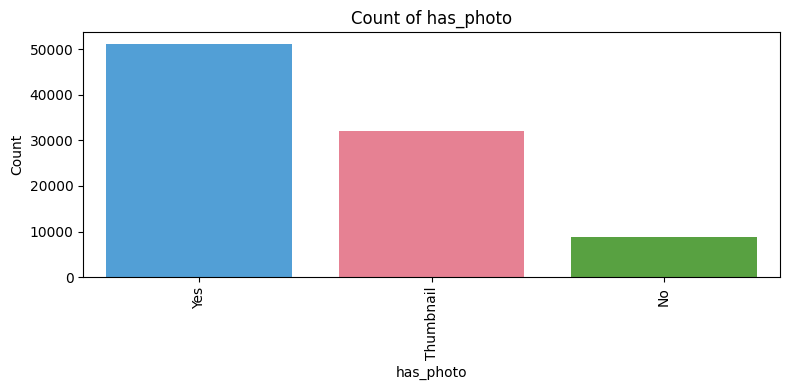

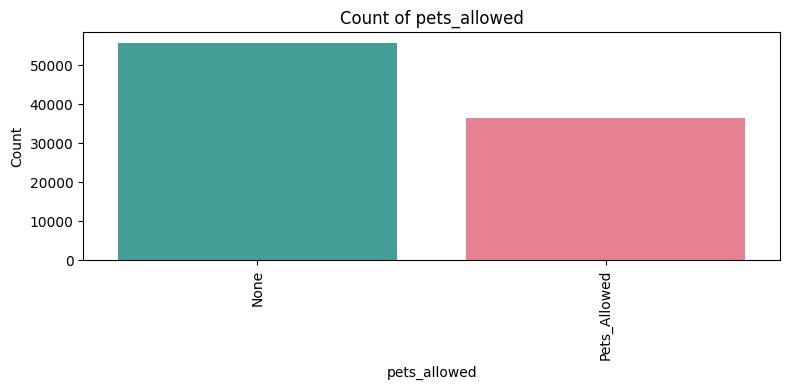

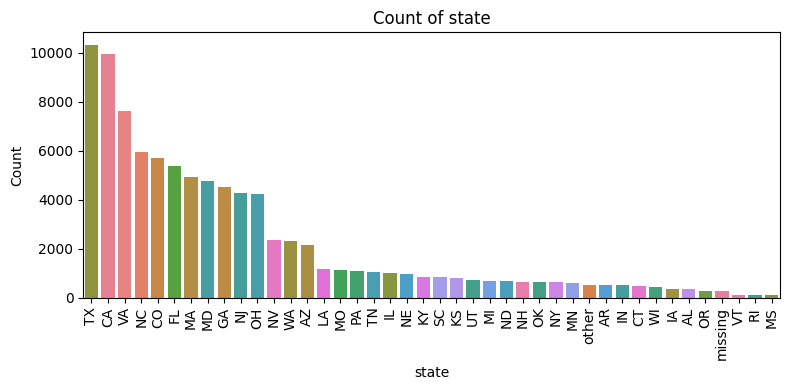

In [ ]:
categorical_col = ['has_photo','pets_allowed','state']

for col in categorical_col:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=listings, palette='husl', order= listings[col].value_counts().index,hue=col,legend=False)
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

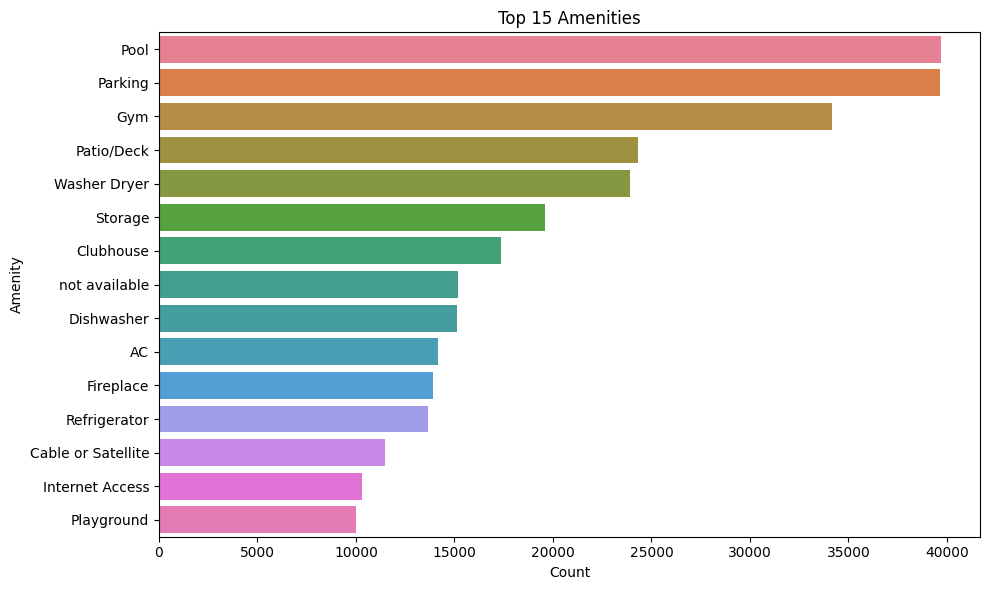

In [ ]:
amenities_list = listings['amenities'].str.split(',').sum()

amenities_count = Counter(amenities_list).most_common(15)

amenities_df = pd.DataFrame(amenities_count, columns=['Amenity', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(y='Amenity', x='Count', data=amenities_df, palette='husl',hue='Amenity',legend='auto')
plt.title("Top 15 Amenities")
plt.xlabel("Count")
plt.ylabel("Amenity")
plt.tight_layout()
plt.show()

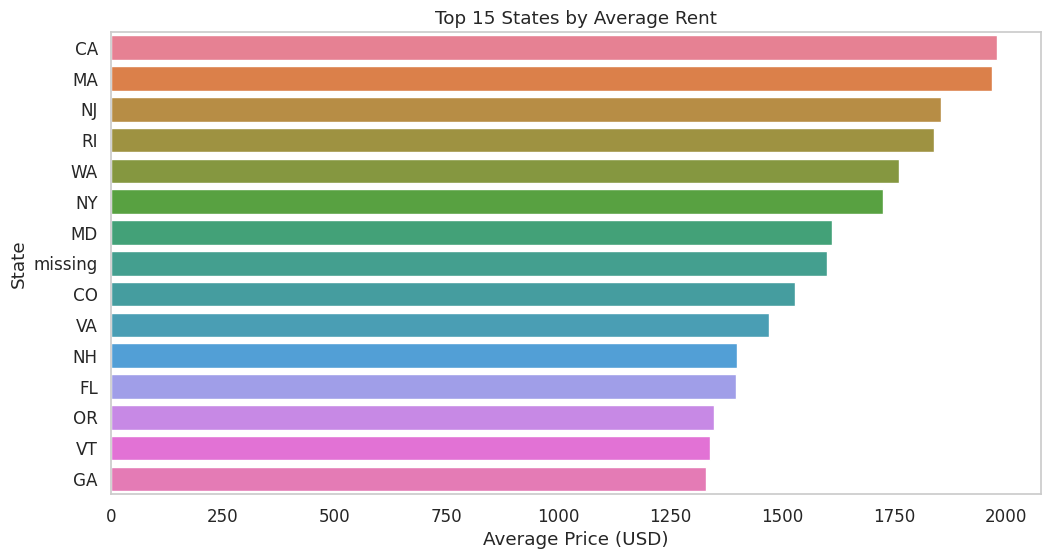

In [ ]:
avg_price_by_state = listings.groupby('state')['price'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_state.values, y=avg_price_by_state.index, palette='husl',hue=avg_price_by_state.index,legend=False)
plt.title("Top 15 States by Average Rent")
plt.xlabel("Average Price (USD)")
plt.ylabel("State")
plt.grid(False)
plt.show()


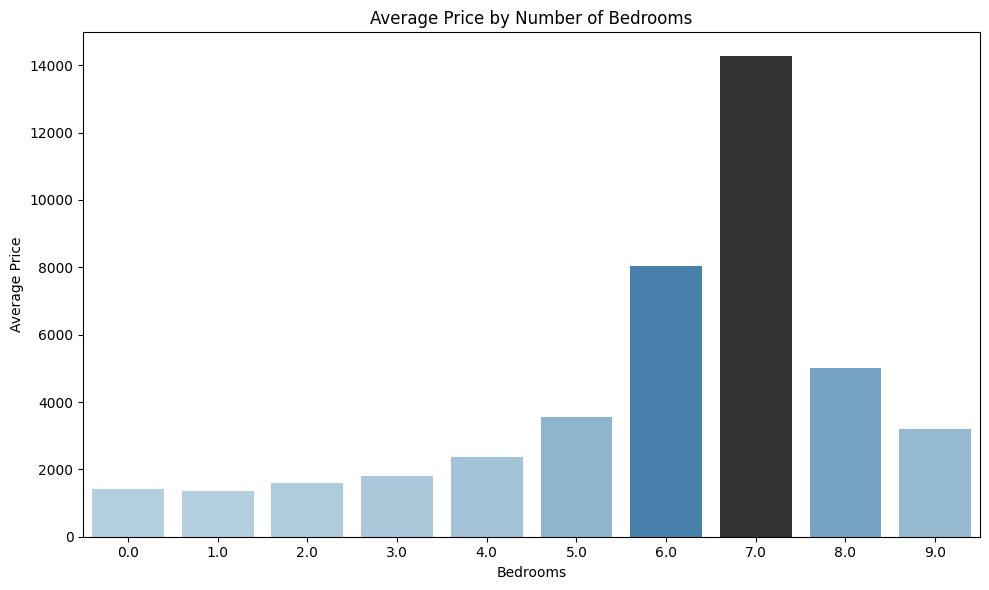

In [ ]:
bedroom_price = listings.groupby('bedrooms')['price'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=bedroom_price, x='bedrooms', y='price', palette='Blues_d',hue='price',legend=False)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.grid(False)
plt.tight_layout()
plt.show()

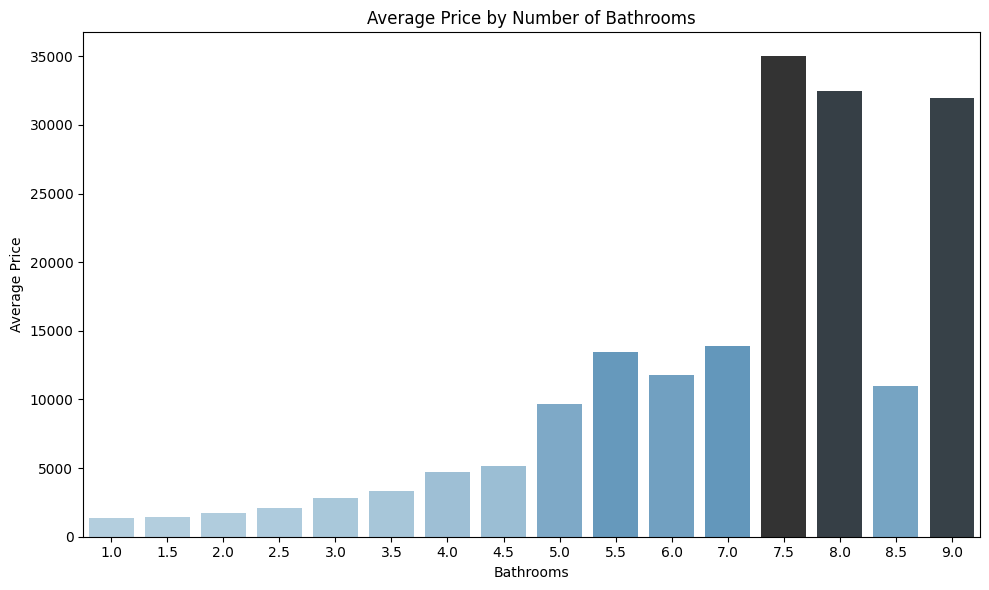

In [ ]:
bathroom_price = listings.groupby('bathrooms')['price'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=bathroom_price, x='bathrooms', y='price', palette='Blues_d',hue='price',legend=False)
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Average Price')
plt.grid(False)
plt.tight_layout()
plt.show()

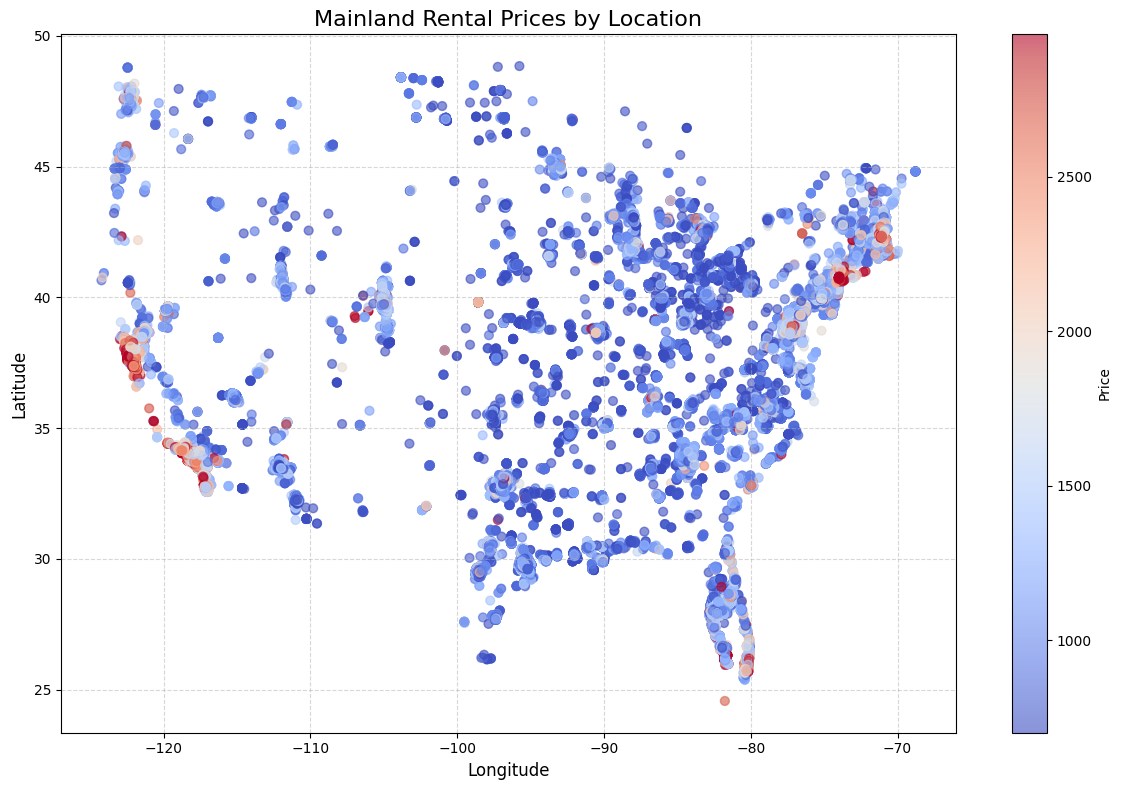

In [ ]:
mainland_data = listings[
    (listings['latitude'] >= 24) & (listings['latitude'] <= 50) &
    (listings['longitude'] >= -125) & (listings['longitude'] <= -66)
]

vmin = mainland_data['price'].quantile(0.05)
vmax = mainland_data['price'].quantile(0.95)

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)


fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(
    x=mainland_data['longitude'],
    y=mainland_data['latitude'],
    c=mainland_data['price'],
    cmap='coolwarm',
    norm=norm,
    alpha=0.6,
    s=40,
    edgecolor=None
)

ax.set_title("Mainland Rental Prices by Location", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

# Create colorbar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Price')

plt.tight_layout()
plt.show()

Really interesting graph as we can tell that states like California or New York display significant difference in apartments prices. Also its really informative as to where are the most aqpartments located.

## Outliers Detection & Removal

We notice earlier in a lot of box-plots and barplots that there are a lot of outliers. We will use the IQR method to deal with them so our analysis and models later will be more smooth.

In [ ]:
initial_rows = listings.shape[0]

#Calculate the IQR bounds
Q1 = listings[numerical_col].quantile(0.25)
Q3 = listings[numerical_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
listings = listings[~((listings[numerical_col] < lower_bound) |
                        (listings[numerical_col] > upper_bound)).any(axis=1)]

# Summary of removal
removed_count = initial_rows - listings.shape[0]
print(f"Removed {removed_count} rows as outliers.")

# Show bounds
print("\nUpper Quantile Range:")
print(upper_bound)
print("\nLower Quantile Range:")
print(lower_bound)

Removed 6894 rows as outliers.

Upper Quantile Range:
bathrooms         3.5
bedrooms          3.5
price          2994.0
square_feet    1707.5
dtype: float64

Lower Quantile Range:
bathrooms       -0.5
bedrooms        -0.5
price         -150.0
square_feet    143.5
dtype: float64


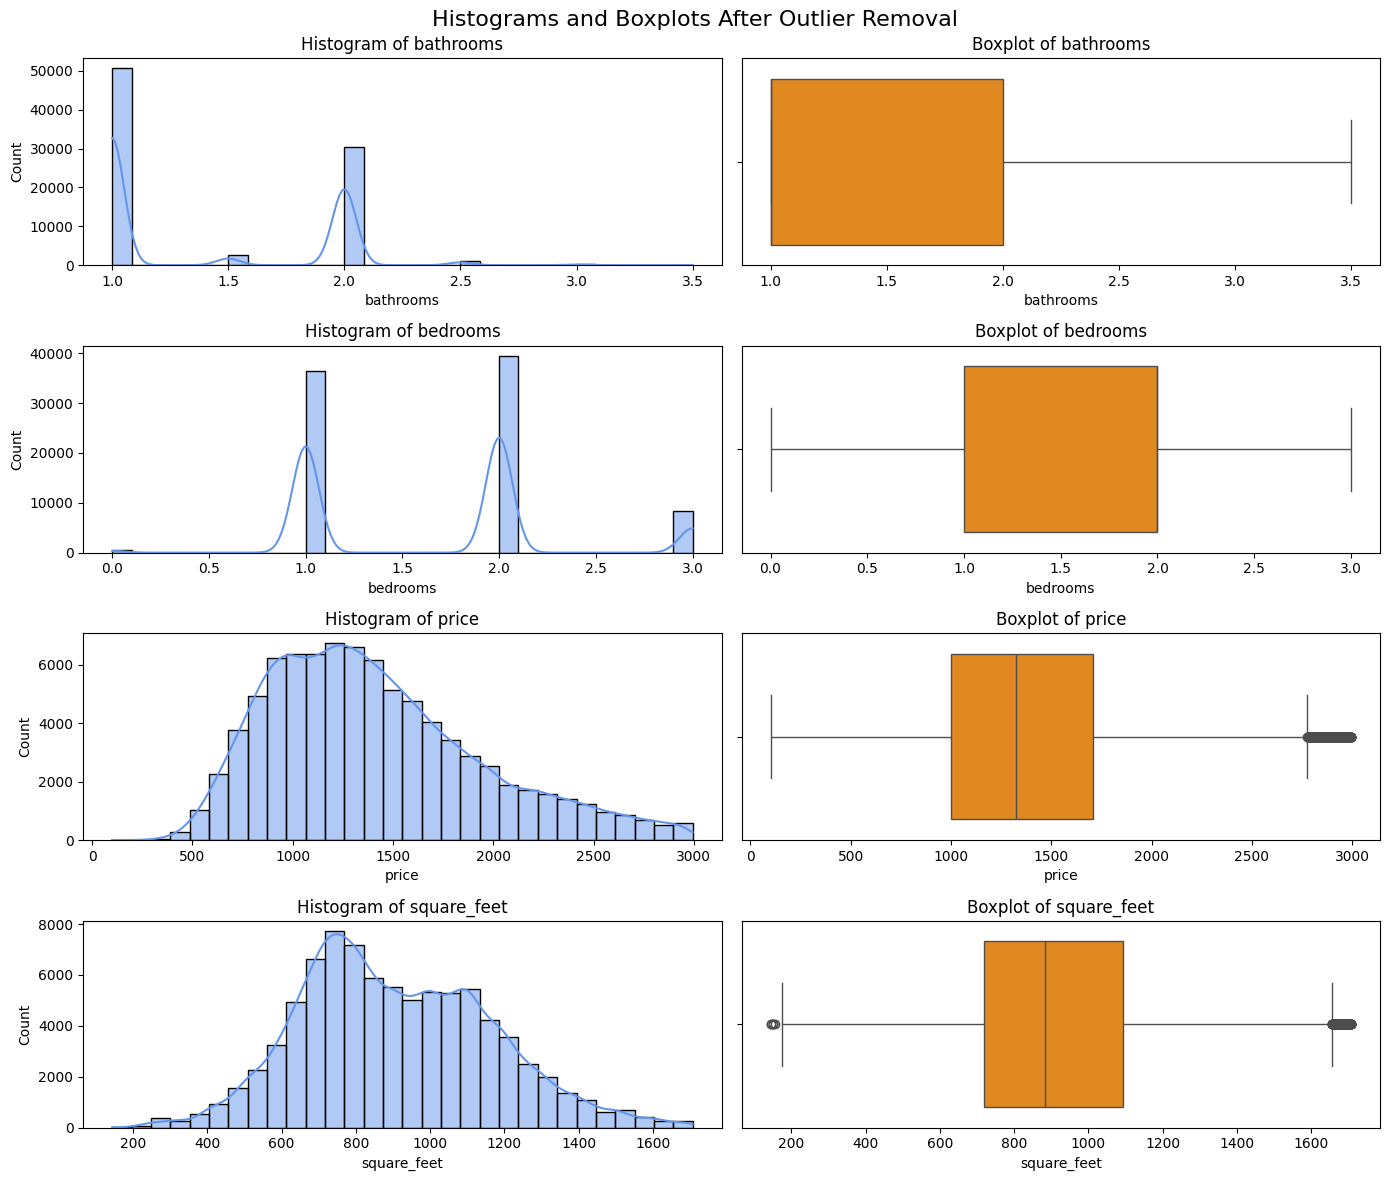

In [ ]:
# Compare variable distributions after outlier removal
fig, axs = plt.subplots(4, 2, figsize=(14, 12))
axs = axs.flatten()

for i, col in enumerate(numerical_col):
    sns.histplot(listings[col], kde=True, bins=30, ax=axs[2*i], color='cornflowerblue')
    axs[2*i].set_title(f"Histogram of {col}")

    sns.boxplot(x=listings[col], ax=axs[2*i+1], color='darkorange')
    axs[2*i+1].set_title(f"Boxplot of {col}")

fig.suptitle("Histograms and Boxplots After Outlier Removal", fontsize=16)
plt.tight_layout()
plt.show()

## Correlation Analysis

In [ ]:
corr_matrix = listings[numerical_col].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [ ]:
price_correlations = corr_matrix['price'].sort_values(ascending=False)
print(price_correlations)

price          1.000000
square_feet    0.300922
bathrooms      0.245014
bedrooms       0.163960
Name: price, dtype: float64


In [ ]:
sns.pairplot(listings[['price','square_feet','bedrooms','bathrooms','latitude','longitude']], diag_kind='kde', plot_kws={'alpha': 0.2})
plt.show()

# Clustering

By looking at the pairplot, it would be interesting to perform a cluster for longitude and latitude.

In [ ]:
#We start by finding the optimal number for clusters based on the elbow method, and the silhouette_score



In [ ]:
#We start by finding the optimal number for clusters based on the elbow method, and the silhouette_score
def plot_elbow_silhouette(X, k_min=2, k_max=8):
    inertias = []
    silhouettes = []

    ks = range(k_min, k_max + 1)

    for k in ks:
        # Instantiate and fit K-Means
        km = KMeans(n_clusters=k, random_state=1,n_init=10)
        labels = km.fit_predict(X)

        # Store the inertia (SSE)
        inertias.append(km.inertia_)

        # Silhouette score (only valid for k > 1)
        s_score = silhouette_score(X, labels)
        silhouettes.append(s_score)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the Elbow curve
    axes[0].plot(ks, inertias, marker='o')
    axes[0].set_title("Elbow Method (Inertia)")
    axes[0].set_xlabel("Number of clusters (k)")
    axes[0].set_ylabel("Inertia (SSE)")

    # Plot the Silhouette scores
    axes[1].plot(ks, silhouettes, marker='o', color='red')
    axes[1].set_title("Silhouette Scores")
    axes[1].set_xlabel("Number of clusters (k)")
    axes[1].set_ylabel("Average Silhouette Score")

    plt.tight_layout()
    plt.show()

cluster_df = listings.copy()
cluster_df= cluster_df.dropna(subset=['latitude', 'longitude'])
X = cluster_df[['latitude','longitude']]
plot_elbow_silhouette(X, k_min=2, k_max=10)

In [ ]:
km = KMeans(n_clusters = 3, n_init=10,random_state = 1)
km.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [ ]:
cluster_df['cluster'] = km.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', palette='tab10', data=cluster_df, alpha=0.6)
plt.title("Locations (Clustered)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Cluster')
plt.show()

# Feature Engineering and Pre processing

## Create price category for classification

In [ ]:
listings['price_category'] = pd.qcut(listings['price'],q=3, labels = ['low','average','high'])

## Split the dataset into training and test data

In [ ]:
X = listings.drop(columns=['price', 'price_category'])
y_reg = listings['price']
y_clf = listings['price_category']

X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X, y_reg, y_clf, test_size=0.2, random_state=5805, stratify=y_clf
)

## Pre processing

We have to do 3 things:
1. One hot encoding
2. Label encoding
3. Impute missing values
4. Make pipelines

In [ ]:
#Lets check again the missing values we have to deal with and the categories
X_train.isnull().sum()

amenities        0
bathrooms       39
bedrooms        88
has_photo        0
pets_allowed     0
square_feet      0
state            0
latitude        17
longitude       17
dtype: int64

### Transformation Pipelines

In [ ]:
# For Amenities we have to create a new class that deals with them

class AmenityEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X_col = X.iloc[:, 0].fillna("not available").astype(str)
        all_amenities = X_col.str.split(',').explode().str.strip()
        self.amenity_list_ = sorted(all_amenities.unique())
        return self

    def transform(self, X):
        X_col = X.iloc[:, 0].fillna("not available").astype(str)
        X_split = X_col.str.split(',')
        result = pd.DataFrame(0, index=X.index, columns=self.amenity_list_)

        for idx, amenities in X_split.items():
            for amenity in amenities:
                amenity = amenity.strip()
                if amenity in result.columns:
                    result.at[idx, amenity] = 1

        return result.values


In [ ]:

num_cols = ['bathrooms', 'bedrooms', 'square_feet', 'latitude', 'longitude']
cat_cols = ['state','has_photo','pets_allowed']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
    ('amenities', AmenityEncoder(), ['amenities'])
])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


In [ ]:
# Fit the pipeline into our training data

X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)


In [ ]:
X_train_prepared.shape

(68040, 80)

### Dimensionality Reduction

As we just saw, 80 features are a lot to deal with and interpret later when we will perform some models for regression and classification. So, we will check for the most important features using Random Forest and also PCA to perform an analysis on the variance explained by our features.

In [ ]:
def dimensionality_reduction(X, y):
    sns.set(style='whitegrid', font_scale=1.1)
    pd.set_option('display.max_columns', None)

    # Random Forest
    print("Random Forest Analysis")
    print("-" * 50)
    model = RandomForestRegressor(random_state=5805)
    model.fit(X, y)

    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(data=feature_importance.head(35),
                x='importance', y='feature', palette='viridis')
    plt.title('Random Forest Feature Importance', fontsize=16, fontweight='bold')
    plt.xlabel('Feature Importance', fontsize=13)
    plt.ylabel('Feature', fontsize=13)
    plt.tight_layout()
    plt.show()

    # PCA
    print("\nPCA Analysis")
    print("-" * 50)
    pca = PCA()
    X_pca = pca.fit_transform(X)

    explained_variance = pd.DataFrame({
        'Component': range(1, len(pca.explained_variance_ratio_) + 1),
        'Explained_Variance': pca.explained_variance_ratio_,
        'Cumulative_Variance': np.cumsum(pca.explained_variance_ratio_)
    })

    features_95_threshold = np.argmax(explained_variance['Cumulative_Variance'] >= 0.95) + 1

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.lineplot(data=explained_variance, x='Component', y='Explained_Variance',
                 marker='o', ax=axes[0], color='royalblue')
    axes[0].set_title('Explained Variance Ratio', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Principal Component')
    axes[0].set_ylabel('Explained Variance')

    sns.lineplot(data=explained_variance, x='Component', y='Cumulative_Variance',
                 marker='o', ax=axes[1], color='crimson')
    axes[1].axhline(y=0.95, linestyle='--', color='gray')
    axes[1].axvline(x=features_95_threshold, linestyle='--', color='gray')
    axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Number of Components')
    axes[1].set_ylabel('Cumulative Variance')

    plt.tight_layout()
    plt.show()

    print(f"\nPCs needed to explain 95% of variance: {features_95_threshold}")

    # Identify features with very low importance
    low_importance_features = feature_importance[feature_importance['importance'] < 0.001]['feature'].tolist()

    print("\nRecommended Features to Remove (importance < 0.001):")
    if low_importance_features:
        for feat in low_importance_features:
            print(f" - {feat}")
    else:
        print("None — all features contribute meaningfully.")


    return feature_importance, explained_variance,low_importance_features


Since after we perform our pipeline transformation the prepared training data we get is an array and not a dataframe we cant get the features names. To solve this problem we create a dataframe of this array with the features names.

In [ ]:
num_features = num_cols

cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'] \
    .named_steps['onehot'].get_feature_names_out(cat_cols)

amenity_features = pipeline.named_steps['preprocessor'].named_transformers_['amenities'].amenity_list_

all_feature_names = list(num_features) + list(cat_features) + list(amenity_features)

X_train_df = pd.DataFrame(X_train_prepared, columns=all_feature_names)

X_train_df.index = X_train.index

In [ ]:
X_train_df.head(2)

bathrooms  bedrooms  square_feet  latitude  longitude  state_AL  \
17166  -0.799299  0.520688    -0.211680  0.633069  -0.892687       0.0   
88842  -0.799299 -0.991309    -0.527115 -0.853089   0.395499       0.0   

       state_AR  state_AZ  state_CA  state_CO  ...  Playground  Pool  \
17166       0.0       0.0       0.0       1.0  ...         1.0   1.0   
88842       0.0       0.0       0.0       0.0  ...         1.0   0.0   

       Refrigerator  Storage   TV  Tennis  View  Washer Dryer  Wood Floors  \
17166           0.0      0.0  0.0     0.0   0.0           0.0          0.0   
88842           0.0      0.0  0.0     0.0   0.0           1.0          0.0   

       not available  
17166            0.0  
88842            0.0  

[2 rows x 80 columns]

Random Forest Analysis
--------------------------------------------------


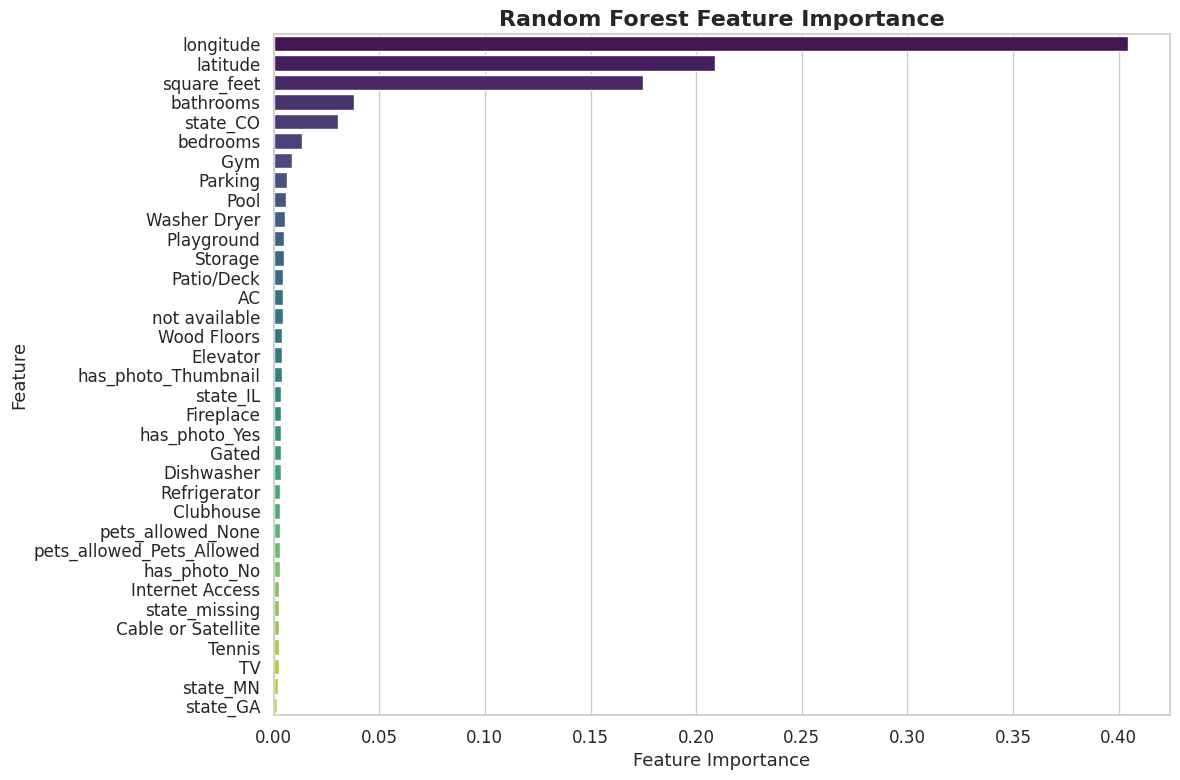


PCA Analysis
--------------------------------------------------



PCs needed to explain 95% of variance: 35

Recommended Features to Remove (importance < 0.001):
 - Basketball
 - state_UT
 - state_OH
 - state_TX
 - Doorman
 - state_PA
 - state_MO
 - state_TN
 - state_AL
 - state_MI
 - state_MA
 - state_VA
 - state_CA
 - state_AR
 - state_NC
 - state_WI
 - state_KS
 - state_KY
 - state_FL
 - Luxury
 - state_AZ
 - state_OK
 - state_IN
 - state_NE
 - state_MS
 - state_SC
 - state_NV
 - state_other
 - state_NJ
 - state_NH
 - state_MD
 - Alarm
 - state_NY
 - state_IA
 - state_ND
 - state_RI
 - state_OR
 - state_WA
 - Golf
 - state_VT


In [ ]:

rf_importance, pca_results, features_to_remove = dimensionality_reduction(X_train_df, y_reg_train)


In [ ]:
# Perfect. Now that we have the features that are important we can drop them and reduce our dimensions of the final dataframe we will use for our modelling.

X_train_final = pd.DataFrame(X_train_prepared, columns=all_feature_names).drop(columns=features_to_remove, errors='ignore')
X_test_final = pd.DataFrame(X_test_prepared, columns=all_feature_names).drop(columns=features_to_remove, errors='ignore')




Let's confirm the reduction of dimensions.

In [ ]:
print(f"Shape of the training set before dimensionality reduction: {X_train_prepared.shape}")

Shape of the training set before dimensionality reduction: (68040, 80)


In [ ]:
print(f"Shape of the training set after dimensionality reduction: {X_train_final.shape}")

Shape of the training set after dimensionality reduction: (68040, 40)


# Regression

## Explore Various Models

There are a lot of models to try for regression. The idea here is that we select some popular models from their very basic structure and compare them based on metrics. (Performance , overfitting etc.)
After that we are going to pick the model that performed the better with as much less overfitting problems and then we will try to optimize it so it performs well but doesnt overfit.

In [ ]:
def displayTable(reg_results):
    results_df = pd.DataFrame(reg_results, columns=[
        "Model", "Train RMSE", "CV RMSE (mean)", "CV MAE (mean)", "R2 Score (test)", "Adjusted R2", "CV RMSE Std"
    ])
    pd.set_option('display.max_colwidth', None)
    pd.set_option('display.max_columns', None)
    result_table = PrettyTable()
    result_table.field_names = results_df.columns
    for row in results_df.itertuples(index=False):
        result_table.add_row(row)
    print(result_table)

def evaluate_models_full(X_train, X_test, y_train, y_test, cv=10):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(),
        'SGD Regressor': SGDRegressor()
    }
    results = []

    for name, model in models.items():
        print(f"\nTraining {name}")

        # Train model (for train RMSE)
        model.fit(X_train, y_train)
        y_train_pred_direct = model.predict(X_train)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_direct))

        # Cross-validation
        cv_rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=cv))
        cv_mae_scores = -cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv=cv)
        cv_rmse_mean = cv_rmse_scores.mean()
        cv_rmse_std = cv_rmse_scores.std()
        cv_mae_mean = cv_mae_scores.mean()

        # R² on test set
        y_test_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_test_pred)
        r2_adj = 1 - (1 - r2) * ((len(y_test) - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

        results.append([
            name,
            round(train_rmse, 2),
            round(cv_rmse_mean, 2),
            round(cv_mae_mean, 2),
            round(r2, 4),
            round(r2_adj, 4),
            round(cv_rmse_std, 2)
        ])

        print(f"{name} Train RMSE: {train_rmse:.2f}")
        print(f"{name} CV RMSE: {cv_rmse_mean:.2f} ± {cv_rmse_std:.2f}")
        print(f"{name} CV MAE: {cv_mae_mean:.2f}")
        print(f"{name} R² (Test): {r2:.4f}, Adjusted R²: {r2_adj:.4f}")

    return results


reg_results = evaluate_models_full(X_train_final, X_test_final, y_reg_train, y_reg_test)
print("\nRegression Models Summary:")
displayTable(reg_results)



Training Linear Regression
Linear Regression Train RMSE: 472.86
Linear Regression CV RMSE: 473.13 ± 4.88
Linear Regression CV MAE: 371.24
Linear Regression R² (Test): 0.2040, Adjusted R²: 0.2021

Training Decision Tree
Decision Tree Train RMSE: 28.08
Decision Tree CV RMSE: 289.67 ± 4.96
Decision Tree CV MAE: 182.14
Decision Tree R² (Test): 0.6996, Adjusted R²: 0.6989

Training Random Forest
Random Forest Train RMSE: 81.25
Random Forest CV RMSE: 210.91 ± 3.73
Random Forest CV MAE: 142.06
Random Forest R² (Test): 0.8442, Adjusted R²: 0.8438

Training SGD Regressor
SGD Regressor Train RMSE: 473.11
SGD Regressor CV RMSE: 473.50 ± 5.07
SGD Regressor CV MAE: 371.33
SGD Regressor R² (Test): 0.2032, Adjusted R²: 0.2013

Regression Models Summary:
+-------------------+------------+----------------+---------------+-----------------+-------------+-------------+
|       Model       | Train RMSE | CV RMSE (mean) | CV MAE (mean) | R2 Score (test) | Adjusted R2 | CV RMSE Std |
+-------------------+-

Let's discuss our findings.
1. Linear Regression and SGD Regressor are underfitting a lot, since the RMSE is really big on both training and cross-validation.
2. Decision Tree performs well but not really good. But it has a huge overfitting problem. We can tell that by comparing train RMSE and CV RMSE. The gap is huge.
3. The model with the best pottential is Random Forest. It performs really good, and has room for optimization to reduce the overfitting.

## Random Forest Optimization

In [ ]:
# Lets create a function that prints the CV RMSE, Train RMSE and R^2 in a pretty table.

def pretty_model_summary(model, X_train, y_train, X_test, y_test, cv=5):
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    cv_scores = cross_val_score(model, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=cv)
    cv_rmse = np.sqrt(-cv_scores).mean()
    r2 = r2_score(y_test, y_test_pred)

    # Create PrettyTable
    table = PrettyTable()
    table.title = "Model Performance Summary"
    table.field_names = ["Metric", "Value"]
    table.align["Metric"] = "l"
    table.align["Value"] = "r"

    table.add_row(["Train RMSE", f"{train_rmse:.4f}"])
    table.add_row([f"CV RMSE ({cv}-fold)", f"{cv_rmse:.4f}"])
    table.add_row(["Test R² Score", f"{r2:.4f}"])

    print(table)

Lets start with our base model that is going to be Random Forest without touching the hyperparameters and use GridSearch to optimize it.

In [ ]:
param_grid = [
    {'n_estimators':[3, 10, 30],
     'max_features':[2, 4, 6, 8]
    },
    {'bootstrap': [False],
     'n_estimators': [3,10],
     'max_features': [2,3,4]},
    ]
base_RF = RandomForestRegressor()
grid_search = GridSearchCV(base_RF, param_grid, cv =5,
                           scoring = 'neg_mean_squared_error',
                           return_train_score = True)
grid_search.fit(X_train_final, y_reg_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Let's see the best estimator GridSearchCV found.
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

Since 8 max_features and 30 estimators are the maximum values that were evaluated, we will try searching again with higher values, since the score may continue to improve. We will use RandomizedSearchCV now because is more fast and its preferable to explore more combinations.

In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None,randint(10, 40)],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': [2,4,'sqrt', 'log2', None],
    'bootstrap': [True]
}


rf1 = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf1,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_final, y_reg_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None,
                                                      <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b8fc215efd0>],
                                        'max_features': [2, 4, 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b8fc215fed0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b8fc215ee50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b8fd3827fd0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
random_search.best_estimator_

RandomForestRegressor(max_features=None, min_samples_leaf=2,
                      min_samples_split=8, n_estimators=102, random_state=42)

In [ ]:
rf1 = random_search.best_estimator_

In [ ]:
pretty_model_summary(rf1, X_train_final, y_reg_train, X_test_final, y_reg_test)

+-----------------------------+
|  Model Performance Summary  |
+------------------+----------+
| Metric           |    Value |
+------------------+----------+
| Train RMSE       | 129.7487 |
| CV RMSE (5-fold) | 219.5159 |
| Test R² Score    |   0.8353 |
+------------------+----------+


We can see that the gap has closed a little bit but we have to regularize it more while trying to improve or stabilize the performance of the model.



---



---



In [ ]:
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(5, 15),
    'min_samples_leaf': randint(3, 10),
    'max_features': ['sqrt', 'log2', 0.3],
    'bootstrap': [True]
}

In [ ]:
rf2 = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf2,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
)

random_search.fit(X_train_final, y_reg_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d551b350>,
                                        'max_features': ['sqrt', 'log2', 0.3],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d551b1d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d551bd90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d5747e50>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rf2 = random_search.best_estimator_

In [ ]:
pretty_model_summary(rf2, X_train_final, y_reg_train, X_test_final, y_reg_test)

+-----------------------------+
|  Model Performance Summary  |
+------------------+----------+
| Metric           |    Value |
+------------------+----------+
| Train RMSE       | 189.8586 |
| CV RMSE (5-fold) | 240.6295 |
| Test R² Score    |   0.7982 |
+------------------+----------+




---



---

In [ ]:

param_dist = {
    'n_estimators': randint(150, 300),
    'max_depth': randint(8, 20),
    'min_samples_split': randint(10, 20),
    'min_samples_leaf': randint(4, 12),
    'max_features': ['sqrt', 'log2', 0.3, 0.4],
    'bootstrap': [True]
}


In [ ]:
rf3 = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf3,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_final, y_reg_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d5765ed0>,
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.4],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b8fc217ed90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d5746bd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d5953d10>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
rf3 = random_search.best_estimator_
pretty_model_summary(rf3, X_train_final, y_reg_train, X_test_final, y_reg_test)

+-----------------------------+
|  Model Performance Summary  |
+------------------+----------+
| Metric           |    Value |
+------------------+----------+
| Train RMSE       | 201.1083 |
| CV RMSE (5-fold) | 241.8485 |
| Test R² Score    |   0.7953 |
+------------------+----------+




---



---



In [ ]:
param_dist = {
    'n_estimators': randint(300, 500),
    'max_depth': randint(10, 18),
    'min_samples_split': randint(12, 25),
    'min_samples_leaf': randint(6, 15),
    'max_features': [None,0.2, 0.3, 'sqrt'],
    'bootstrap': [True]
}

In [ ]:

rf_final = RandomForestRegressor(random_state=42)

final_search = RandomizedSearchCV(
    estimator=rf_final,
    param_distributions=param_dist,
    n_iter=60,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=99,
    n_jobs=-1
)

final_search.fit(X_train_final, y_reg_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d57c7fd0>,
                                        'max_features': [None, 0.2, 0.3,
                                                         'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d5525ad0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d56c8fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b90d57affd0>},
                   random_state=99, scoring='neg_mean_squared_error')

In [ ]:
rf_final = random_search.best_estimator_
pretty_model_summary(rf_final, X_train_final, y_reg_train, X_test_final, y_reg_test)

+-----------------------------+
|  Model Performance Summary  |
+------------------+----------+
| Metric           |    Value |
+------------------+----------+
| Train RMSE       | 201.1083 |
| CV RMSE (5-fold) | 241.8485 |
| Test R² Score    |   0.7953 |
+------------------+----------+




---



---





In [ ]:

summary_rf = pd.DataFrame({
    'Model Version': ['Initial Model', 'Tuned #1', 'Tuned #2', 'Final Tuning'],
    'Train RMSE': [129.0000, 189.8586, 201.1083, 201.1083],
    'CV RMSE (5-fold)': [219.0000, 240.6295, 241.8485, 241.8485],
    'Test R² Score': [0.8350, 0.7982, 0.7953, 0.7953]
})

summary_rf.style.set_caption("Random Forest Model Comparison")

## Regression Analysis

In [ ]:
from statsmodels.graphics.gofplots import qqplot
def plot_regression_diagnostics(model, X_test, y_test):
    y_pred = model.predict(X_test).flatten()
    residuals = y_test - y_pred

    fig, axes = plt.subplots(1, 4, figsize=(22, 5))


    sns.scatterplot(x=y_test, y=y_pred, ax=axes[0])
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predicted")
    axes[0].set_title("Predicted vs Actual")


    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1])
    axes[1].axhline(0, color='red', linestyle='--')
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Residuals")
    axes[1].set_title("Residuals vs Predicted")


    sns.histplot(residuals, bins=30, kde=True, ax=axes[2])
    axes[2].set_xlabel("Residuals")
    axes[2].set_title("Distribution of Residuals")


    qqplot(residuals, line='s', ax=axes[3])
    axes[3].set_title("QQ Plot of Residuals")

    plt.tight_layout()
    plt.show()

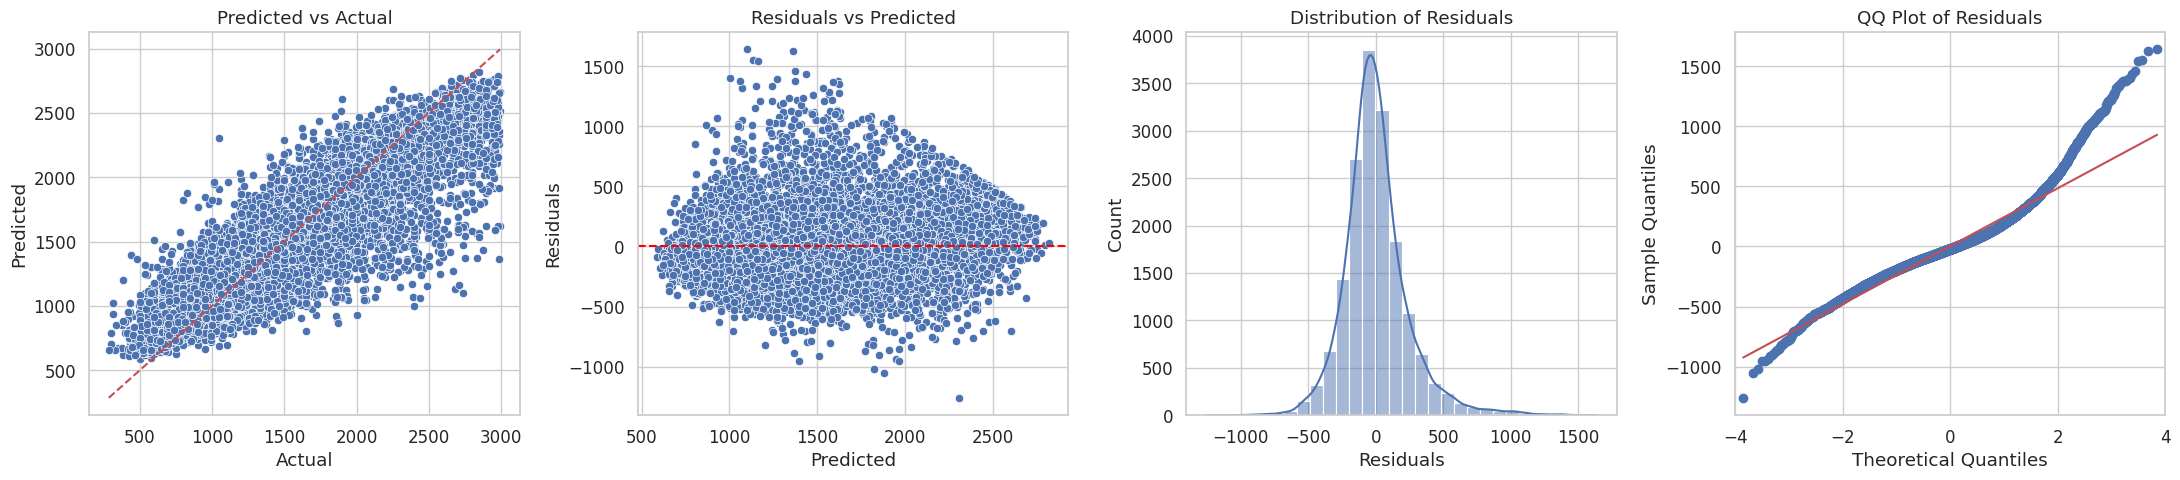

In [ ]:
plot_regression_diagnostics(rf_final, X_test_final, y_reg_test)

The model shows strong predictive capability, but:

- Some heteroscedasticity is present.

- Residuals are nearly normal, but tail behavior may need closer inspection.

These diagnostics suggest the model is generally sound but could benefit from improvements (e.g., transforming variables, addressing variance).

## Neural Networks - MLP Model

Now we are going to create a sequential model (MLP for Regression) using Tensorflow.

In [ ]:
#Split the training dataset also for validation now.
X_train, X_valid, y_train, y_valid = train_test_split(X_train_final, y_reg_train)

In [ ]:
def summarize_mlp_model(model, X_train, y_train, X_valid, y_valid, X_test, y_test):

    # Predictions
    y_train_pred = model.predict(X_train).flatten()
    y_valid_pred = model.predict(X_valid).flatten()
    y_test_pred = model.predict(X_test).flatten()

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    # PrettyTable
    table = PrettyTable()
    table.title = "Neural Network Performance Summary"
    table.field_names = ["Metric", "Value"]
    table.align["Metric"] = "l"
    table.align["Value"] = "r"

    table.add_row(["Train RMSE", f"{train_rmse:.4f}"])
    table.add_row(["Validation RMSE", f"{val_rmse:.4f}"])
    table.add_row(["Test R² Score", f"{test_r2:.4f}"])

    print(table)

In [ ]:
base_mlp = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=X_train.shape[1:]),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(50, activation="relu"),
        keras.layers.Dense(1)
    ])
base_mlp.compile(loss="mean_squared_error", optimizer="adam")
history = base_mlp.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid))
mse_test = base_mlp.evaluate(X_test_final, y_reg_test)

Epoch 1/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 951636.1250 - val_loss: 230307.2344
Epoch 2/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 219681.7812 - val_loss: 211673.7188
Epoch 3/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 195733.7188 - val_loss: 174375.2656
Epoch 4/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 167950.8906 - val_loss: 155528.3906
Epoch 5/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 155680.4688 - val_loss: 149011.1562
Epoch 6/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 149526.7969 - val_loss: 146006.0938
Epoch 7/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 145268.2656 - val_loss: 144003.0938
Epoch 8/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 143664.1094 - val_loss: 142485.1719
Epoch 9/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 140567.0781 - val_loss: 141039.5938
Epoch 10/100
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 140401.0000 - val_loss: 139092.6406
Epoch 11/

In [ ]:
summarize_mlp_model(base_mlp, X_train_final, y_reg_train, X_valid, y_valid, X_test_final, y_reg_test)

2127/2127 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
+------------------------------------+
| Neural Network Performance Summary |
+----------------------+-------------+
| Metric               |       Value |
+----------------------+-------------+
| Train RMSE           |    297.1648 |
| Validation RMSE      |    310.2046 |
| Test R² Score        |      0.6558 |
+----------------------+-------------+




---



---



## Optimization and Parameter Tuning

We will implement Early Stop to stop the training process if the performance doesn't improve for a certain number of epochs. Also we are setting up a learning rate scheduler. f the model's performance on the validation data plateaus, the learning rate will be reduced by a factor (0.5) to help the model fine-tune its weights.

In [ ]:
mlp_tune1 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

mlp_tune1.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=0.005)
)

early_stop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
lr_schedule = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

history = mlp_tune1.fit(
    X_train, y_train,
    epochs=100,
    batch_size=512,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop_cb, lr_schedule]
)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 1599676.8750 - val_loss: 229737.8750 - learning_rate: 0.0120
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206786.6250 - val_loss: 167339.0312 - learning_rate: 0.0120
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159425.5625 - val_loss: 152322.8906 - learning_rate: 0.0120
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 151556.7344 - val_loss: 148574.4688 - learning_rate: 0.0120
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 149584.1875 - val_loss: 146566.3125 - learning_rate: 0.0120
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 146877.6875 - val_loss: 145028.5000 - learning_rate: 0.0120
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 145576.2500 - val_loss: 143839.2812 - learning_rate: 0.0120
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 145780.2500 - val_loss: 143640.9688 - learning_rate: 0.0120
Epoch 9/100
100/100 ━━━━━━━━━

In [ ]:
summarize_mlp_model(mlp_tune1, X_train_final, y_reg_train, X_valid, y_valid, X_test_final, y_reg_test)

2127/2127 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
+------------------------------------+
| Neural Network Performance Summary |
+----------------------+-------------+
| Metric               |       Value |
+----------------------+-------------+
| Train RMSE           |    313.8675 |
| Validation RMSE      |    322.7719 |
| Test R² Score        |      0.6286 |
+----------------------+-------------+


It peformed worse now we will not use early stop now and lower down the learning rate and also the batch size.


---



---



In [ ]:
mlp_tune2 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1)
])

mlp_tune2.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=0.003)
)


history = mlp_tune2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=256,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_schedule]  # no early stop  now
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 1789896.3750 - val_loss: 274239.5625 - learning_rate: 0.0030
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 242245.0312 - val_loss: 217686.3750 - learning_rate: 0.0030
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 204105.4062 - val_loss: 185850.6875 - learning_rate: 0.0030
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 176422.1406 - val_loss: 162614.5781 - learning_rate: 0.0030
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 160129.8438 - val_loss: 153277.7969 - learning_rate: 0.0030
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 152351.4375 - val_loss: 149228.2031 - learning_rate: 0.0030
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 149114.9375 - val_loss: 147704.3438 - learning_rate: 0.0030
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 147522.8906 - val_loss: 146260.0625 - learning_rate: 0.0030
Epoch 9/100
200/200 ━━━━━━━━━━

In [ ]:
summarize_mlp_model(mlp_tune2, X_train_final, y_reg_train, X_valid, y_valid, X_test_final, y_reg_test)

2127/2127 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
+------------------------------------+
| Neural Network Performance Summary |
+----------------------+-------------+
| Metric               |       Value |
+----------------------+-------------+
| Train RMSE           |    305.6136 |
| Validation RMSE      |    317.1544 |
| Test R² Score        |      0.6422 |
+----------------------+-------------+


We will implement a manually made gridsearch to find the best parameters.


---



---



### Manual GridSearch

Total combinations = 3 × 3 × 3 × 2 × 2 = **108 combinations**

In [ ]:

hidden_layers = [2, 3,4]
neurons = [100,200,300]
learning_rates = [3e-4, 1e-3, 3e-3]
batch_sizes = [128, 256]
dropout_rates = [0.0, 0.2]  # 0.0 = no dropout, 0.2 = regularized

best_model = None
best_val_rmse = float("inf")
best_params = {}

for n_hidden in hidden_layers:
    for n_neurons in neurons:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                for dropout_rate in dropout_rates:
                    print(f"\nTraining model: {n_hidden} hidden layers, "
                          f"{n_neurons} neurons, lr={lr}, batch={batch_size}, dropout={dropout_rate}")

                    model = keras.Sequential()
                    model.add(keras.layers.InputLayer(input_shape=X_train.shape[1:]))

                    for _ in range(n_hidden):
                        model.add(keras.layers.Dense(n_neurons, activation="relu"))
                        if dropout_rate > 0:
                            model.add(keras.layers.Dropout(dropout_rate))

                    model.add(keras.layers.Dense(1))
                    optimizer = keras.optimizers.Adam(learning_rate=lr)
                    model.compile(loss="mse", optimizer=optimizer)

                    early_stop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
                    history = model.fit(
                        X_train, y_train,
                        epochs=50,
                        batch_size=batch_size,
                        validation_data=(X_valid, y_valid),
                        callbacks=[early_stop_cb],
                        verbose=0
                    )

                    # Predictions
                    y_train_pred = model.predict(X_train)
                    y_val_pred = model.predict(X_valid)

                    # Compute RMSEs
                    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
                    val_rmse = np.sqrt(mean_squared_error(y_valid, y_val_pred))

                    print(f"Train RMSE: {train_rmse:.2f}, Validation RMSE: {val_rmse:.2f}")

                    # Update best model
                    if val_rmse < best_val_rmse:
                        best_val_rmse = val_rmse
                        best_model = model
                        best_params = {
                            "n_hidden": n_hidden,
                            "n_neurons": n_neurons,
                            "learning_rate": lr,
                            "batch_size": batch_size,
                            "dropout_rate": dropout_rate,
                            "train_rmse": train_rmse,
                            "val_rmse": val_rmse
                        }

# Final summary
print("\nBest Model Parameters:")
for key, val in best_params.items():
    print(f"{key}: {val}")



Training model: 2 hidden layers, 100 neurons, lr=0.0003, batch=128, dropout=0.0
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Train RMSE: 370.38, Validation RMSE: 370.96

Training model: 2 hidden layers, 100 neurons, lr=0.0003, batch=128, dropout=0.2
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train RMSE: 381.73, Validation RMSE: 381.73

Training model: 2 hidden layers, 100 neurons, lr=0.0003, batch=256, dropout=0.0
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train RMSE: 380.79, Validation RMSE: 380.29

Training model: 2 hidden layers, 100 neurons, lr=0.0003, batch=256, dropout=0.2
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train RMSE: 385.15, Validation RMSE: 385.13

Training model: 2 hidden layers, 100 neurons, lr=0.001, batch=128, dropout=0.0
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step




---



---



In [ ]:
mlp_final = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(1)
])

mlp_final.compile(
    loss="mse",
    optimizer=keras.optimizers.Adam(learning_rate=0.003)
)

history = mlp_final.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)


Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 664878.4375 - val_loss: 150091.8594
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 158665.7656 - val_loss: 142765.9844
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 155833.1406 - val_loss: 142643.5312
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 150028.3750 - val_loss: 132815.9375
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 145729.4062 - val_loss: 122172.5156
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 135061.7500 - val_loss: 118398.9453
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 128302.5781 - val_loss: 119006.3438
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 123399.8203 - val_loss: 114507.1250
Epoch 9/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 120040.4609 - val_loss: 110122.5234
Epoch 10/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 117960.6406 - val_loss: 110465.2812
Epoch 11/100
399/399 ━━━━━━━

In [ ]:
summarize_mlp_model(mlp_final, X_train_final, y_reg_train, X_valid, y_valid, X_test_final, y_reg_test)

2127/2127 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
+------------------------------------+
| Neural Network Performance Summary |
+----------------------+-------------+
| Metric               |       Value |
+----------------------+-------------+
| Train RMSE           |    261.4341 |
| Validation RMSE      |    295.7781 |
| Test R² Score        |      0.6852 |
+----------------------+-------------+


For parameter tuning a good implementetion would be to build a model and then use Keras Regressor and perform a RandomizedSearchCV like we are doing above but not manually. Below is the code for that. The problem was than in the new version of tensorflow you have to import KerasRegressor from scikeras and it has a lot of bugs. So unfortunately it wasn't possible.

In [ ]:
"""
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(X_train.shape[1],)):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    model.compiled = True
    return model

from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(
    model=build_model,
    verbose=0
)

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "model__n_hidden": [0, 1, 2, 3],
    "model__n_neurons": np.arange(10, 100),
    "model__learning_rate": reciprocal(3e-4, 3e-2)
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=5, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                      validation_data=(X_valid, y_valid),
                      callbacks=[keras.callbacks.EarlyStopping(patience=10)])
"""

In [ ]:
summary_mlp = pd.DataFrame({
    'Model Version': ['Initial Model', 'Tuned #1', 'Tuned #2', 'Final Tuning'],
    'Train RMSE': [297.1648, 313.8675, 305.6136, 261.4341],
    'Validation RMSE': [310.2046, 322.7719, 317.1544, 295.7781],
    'Test R² Score': [0.6558, 0.6286, 0.6422, 0.6852]
})

summary_mlp.style.set_caption("Neural Network Model Comparison")



---



---



## Final Summary of the Models

In [ ]:
summary_final = pd.DataFrame({
    'Model Type': ['Random Forest', 'Random Forest', 'Neural Network', 'Neural Network'],
    'Model Version': ['Initial Model', 'Final Tuning', 'Initial Model', 'Final Tuning'],
    'Train RMSE': [129.0000, 201.1083, 297.1648, 261.4341],
    'CV/Validation RMSE': [219.0000, 241.8485, 310.2046, 295.7781],
    'Test R² Score': [0.8350, 0.7953, 0.6558, 0.6852]
})

summary_final.style.set_caption("Final Model Comparison: Initial vs Tuned (RF & NN)")




---



---



We can say that the model that performs the best is the Random Forest but with shlightly worse overfitting than the MLP one.

Both models required a lot of regularization and parameter tuning.

# Classification

Check for class imblanace in the target value.

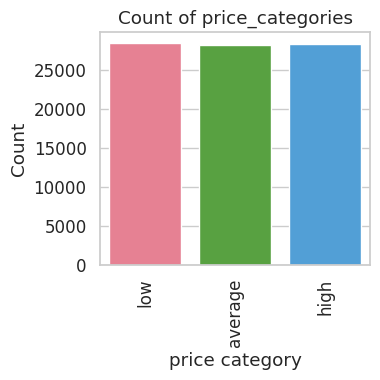

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='price_category', data=listings, palette='husl',legend=False)
plt.title("Count of price_categories")
plt.xlabel('price category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Explore Various Models

In [ ]:
def evaluate_and_visualize_model(model, X_train, X_test, y_train, y_test, class_names=None, model_name="Model"):
    print(f"\nEvaluating: {model_name}")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # === Metrics ===
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_ovr = roc_auc_score(y_test, y_proba, multi_class='ovr')
    auc_ovo = roc_auc_score(y_test, y_proba, multi_class='ovo')

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"ROC AUC (OvR): {auc_ovr:.4f}")
    print(f"ROC AUC (OvO): {auc_ovo:.4f}")

    # === Subplot: Confusion Matrix and ROC Curves ===
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[0])
    axes[0].set_title(f"{model_name} - Confusion Matrix")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    # ROC Curves
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    for i in range(len(model.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        axes[1].plot(fpr, tpr, label=f"Class '{model.classes_[i]}' (AUC = {roc_auc:.2f})")
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_title(f"{model_name} - ROC Curve (OvR)")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

    return {
        'model': model_name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'auc_ovr': auc_ovr,
        'auc_ovo': auc_ovo
    }



Evaluating: Logistic Regression
Accuracy : 0.5183
Precision: 0.5141
Recall   : 0.5183
F1 Score : 0.5080
ROC AUC (OvR): 0.7027
ROC AUC (OvO): 0.7026



Evaluating: Random Forest
Accuracy : 0.8131
Precision: 0.8128
Recall   : 0.8131
F1 Score : 0.8129
ROC AUC (OvR): 0.9342
ROC AUC (OvO): 0.9342


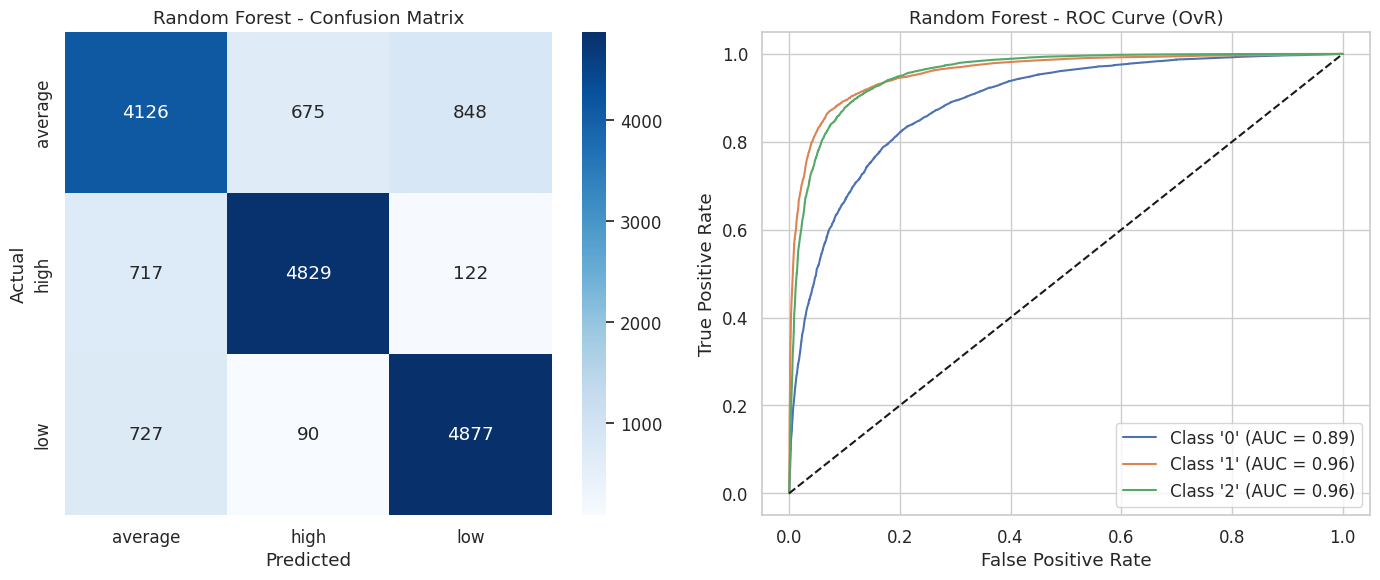


Evaluating: XGBClassifier
Accuracy : 0.7870
Precision: 0.7886
Recall   : 0.7870
F1 Score : 0.7872
ROC AUC (OvR): 0.9268
ROC AUC (OvO): 0.9267


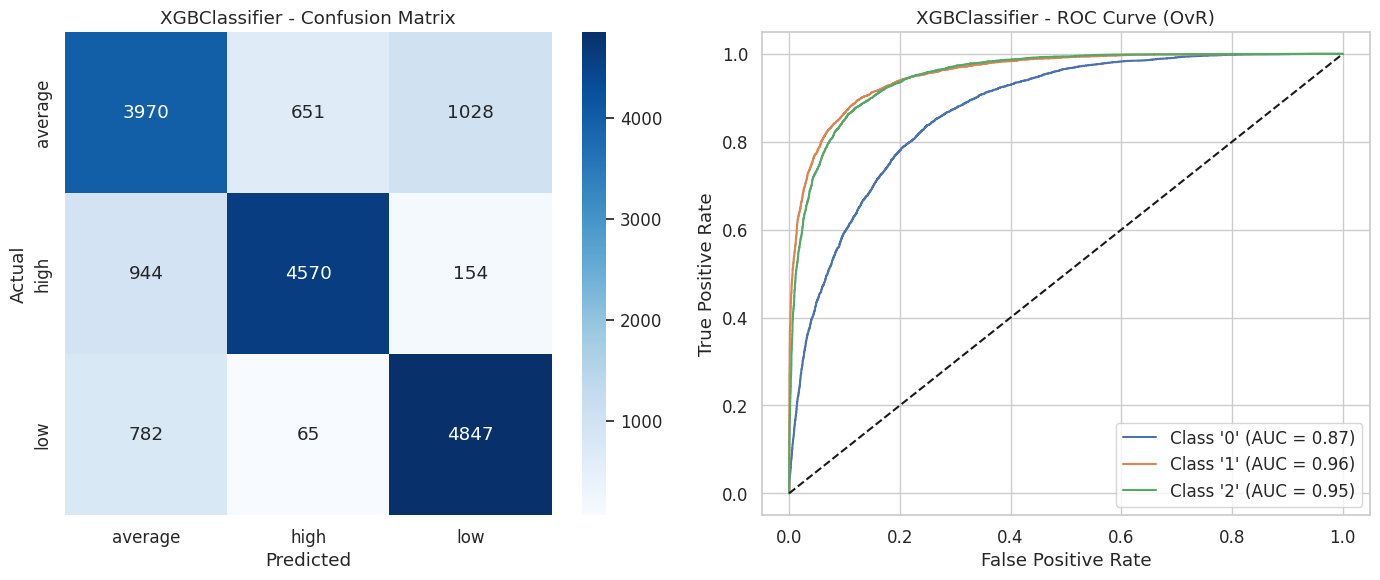


Evaluating: KNN
Accuracy : 0.6747
Precision: 0.6812
Recall   : 0.6747
F1 Score : 0.6765
ROC AUC (OvR): 0.8361
ROC AUC (OvO): 0.8360


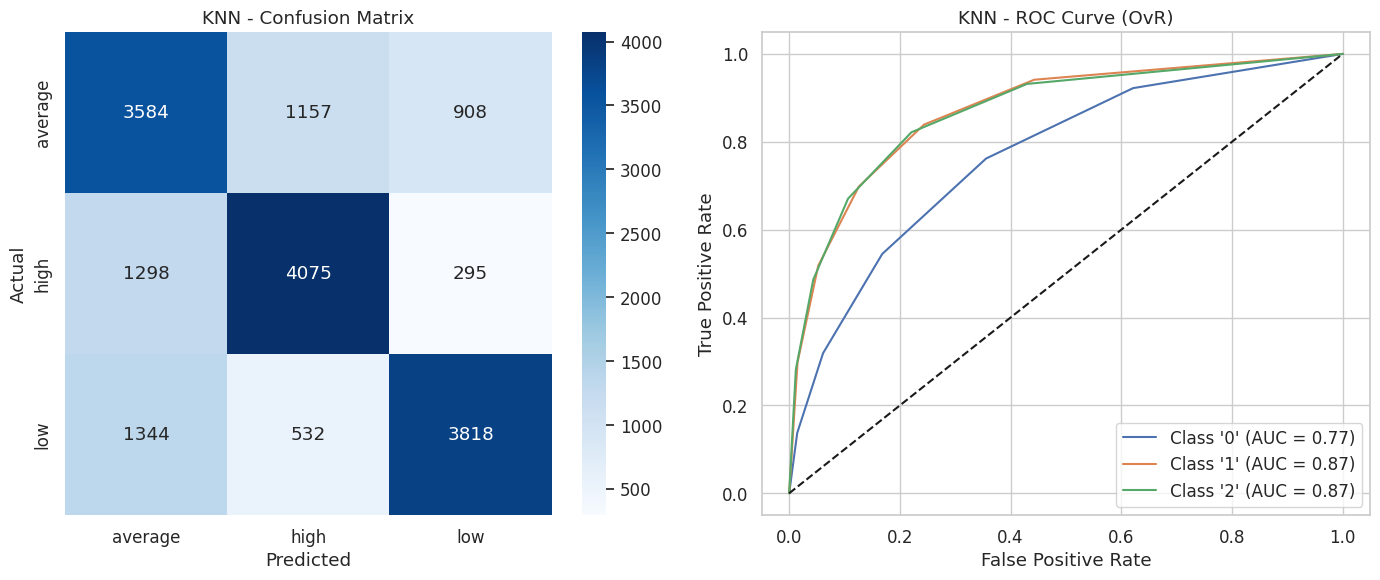


Evaluating: Naive Bayes
Accuracy : 0.4853
Precision: 0.4896
Recall   : 0.4853
F1 Score : 0.4540
ROC AUC (OvR): 0.6676
ROC AUC (OvO): 0.6675


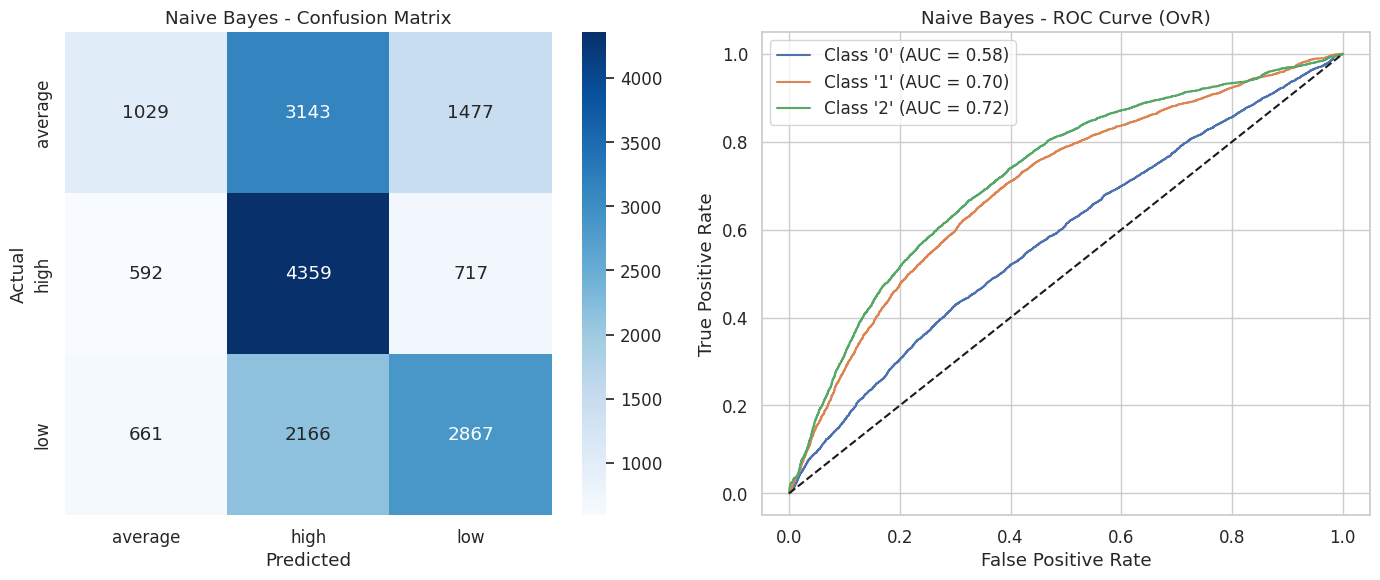


Evaluating: Decision Tree
Accuracy : 0.7761
Precision: 0.7776
Recall   : 0.7761
F1 Score : 0.7768
ROC AUC (OvR): 0.8372
ROC AUC (OvO): 0.8371


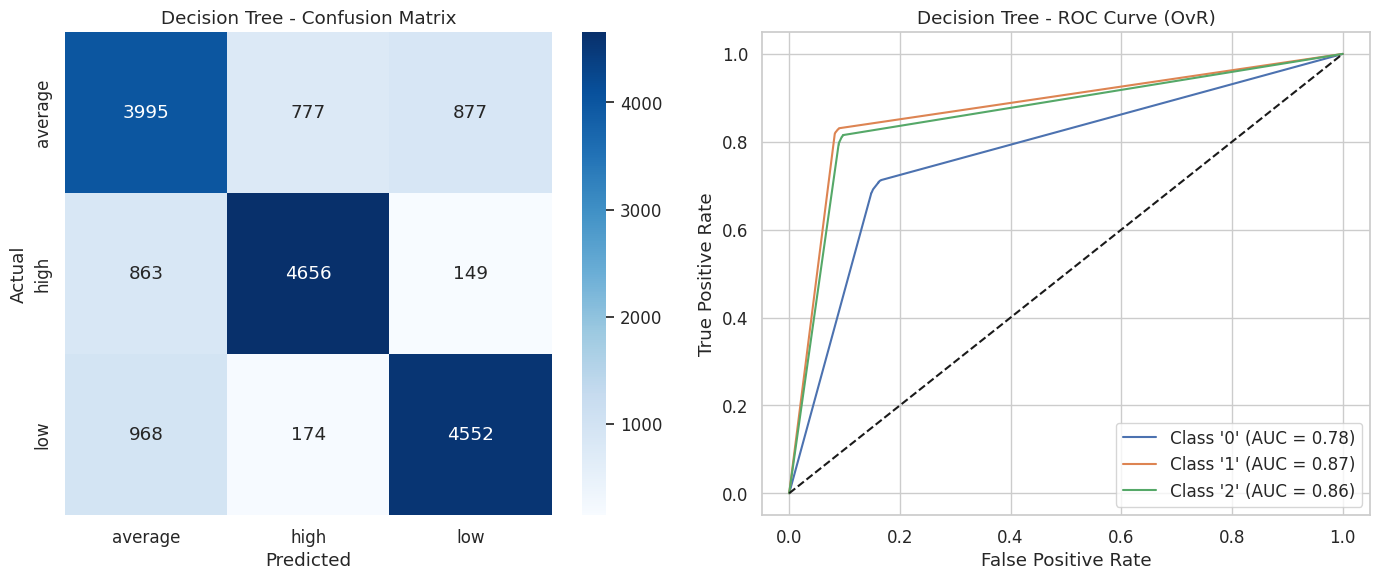


Evaluating: Gradient Boosting
Accuracy : 0.7023
Precision: 0.7019
Recall   : 0.7023
F1 Score : 0.7014
ROC AUC (OvR): 0.8662
ROC AUC (OvO): 0.8661


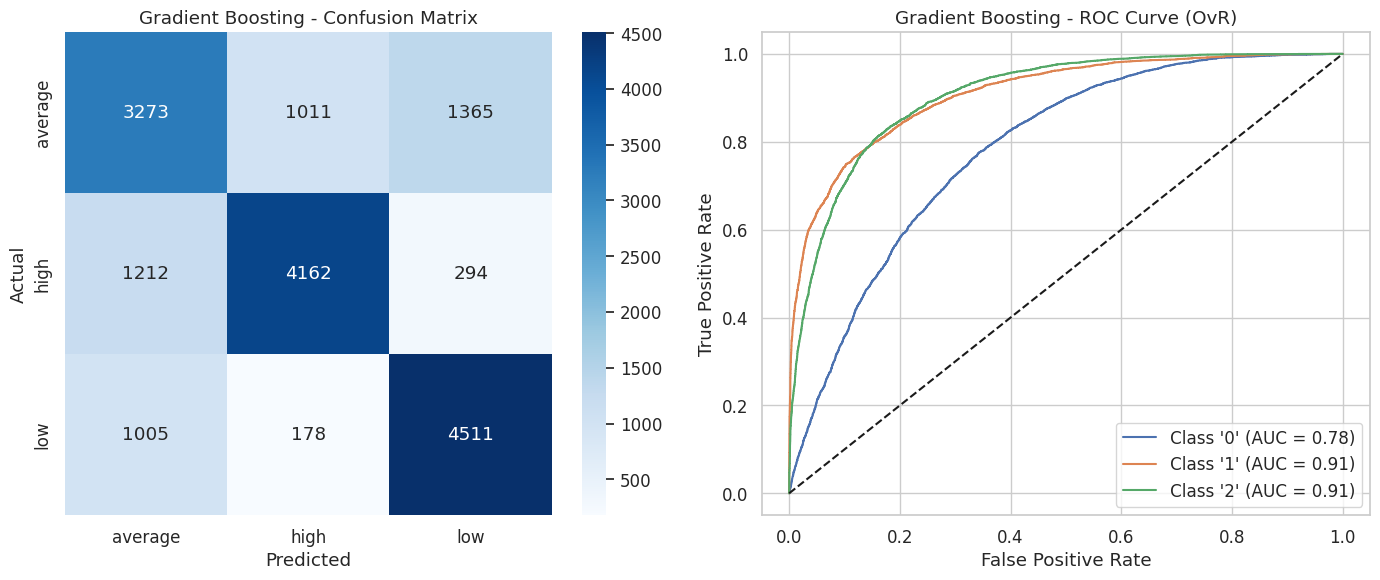

In [ ]:
models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(),
        'XGBClassifier': XGBClassifier(),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(),
        'Gradient Boosting': GradientBoostingClassifier()
        }

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_clf_train)
y_test_encoded = label_encoder.transform(y_clf_test)
class_names = label_encoder.classes_

""" We use fit_transform only on the training data and transform
on the test data to prevent information from the test set from
influencing the training process, ensuring a more accurate assessment
of the model's ability to generalize to new, unseen data.
"""

# Run evaluation and collect results
results_summary = []

for name, clf in models.items():
    metrics = evaluate_and_visualize_model(
        clf,
        X_train_final, X_test_final,
        y_train_encoded, y_test_encoded,
        class_names=class_names,
        model_name=name
    )
    results_summary.append(metrics)

In [ ]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC (OvR)", "ROC AUC (OvO)"]

for result in results_summary:
    table.add_row([
        result['model'],
        f"{result['accuracy']:.4f}",
        f"{result['precision']:.4f}",
        f"{result['recall']:.4f}",
        f"{result['f1']:.4f}",
        f"{result['auc_ovr']:.4f}",
        f"{result['auc_ovo']:.4f}"
    ])

print("Model Performance Summary:")
print(table)

Model Performance Summary:
+---------------------+----------+-----------+--------+----------+---------------+---------------+
|        Model        | Accuracy | Precision | Recall | F1 Score | ROC AUC (OvR) | ROC AUC (OvO) |
+---------------------+----------+-----------+--------+----------+---------------+---------------+
| Logistic Regression |  0.5183  |   0.5141  | 0.5183 |  0.5080  |     0.7027    |     0.7026    |
|    Random Forest    |  0.8121  |   0.8115  | 0.8121 |  0.8117  |     0.9351    |     0.9351    |
|    XGBClassifier    |  0.7870  |   0.7886  | 0.7870 |  0.7872  |     0.9268    |     0.9267    |
|         KNN         |  0.6747  |   0.6812  | 0.6747 |  0.6765  |     0.8361    |     0.8360    |
|     Naive Bayes     |  0.4853  |   0.4896  | 0.4853 |  0.4540  |     0.6676    |     0.6675    |
|    Decision Tree    |  0.7752  |   0.7766  | 0.7752 |  0.7758  |     0.8366    |     0.8365    |
|  Gradient Boosting  |  0.7023  |   0.7019  | 0.7023 |  0.7014  |     0.8662    |

We can see clearly that the models that perform the best are Random Forest and XGBClassifier. We are now going to optimize them.

First we want to see if RF overfits the data, so we will plot the learning curves.

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, f1_score

def plot_learning_curves(model, X, y, scoring='f1_weighted', cv=3, train_sizes=np.linspace(0.1, 1.0, 5), random_state=42):
    """
    Plots learning curves for a classification model using cross-validation.

    Parameters:
        model: scikit-learn compatible classifier
        X: training features
        y: training labels (encoded)
        scoring: scoring metric (default: f1_weighted)
        cv: number of cross-validation folds
        train_sizes: array of training set sizes (default: np.linspace(0.1, 1.0, 5))
    """

    print("Computing learning curves")
    scorer = make_scorer(f1_score, average='weighted')

    train_sizes_abs, train_scores, val_scores = learning_curve(
        model, X, y,
        train_sizes=train_sizes,
        cv=cv,
        scoring=scorer if scoring == 'f1_weighted' else scoring,
        random_state=random_state,
        n_jobs=-1
    )

    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    val_scores_std = val_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='blue', label='Training F1 Score')
    plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')

    plt.plot(train_sizes_abs, val_scores_mean, 'o-', color='green', label='Validation F1 Score')
    plt.fill_between(train_sizes_abs, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color='green')

    plt.title('Learning Curves')
    plt.xlabel('Training Set Size')
    plt.ylabel('F1 Score (weighted)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Computing learning curves


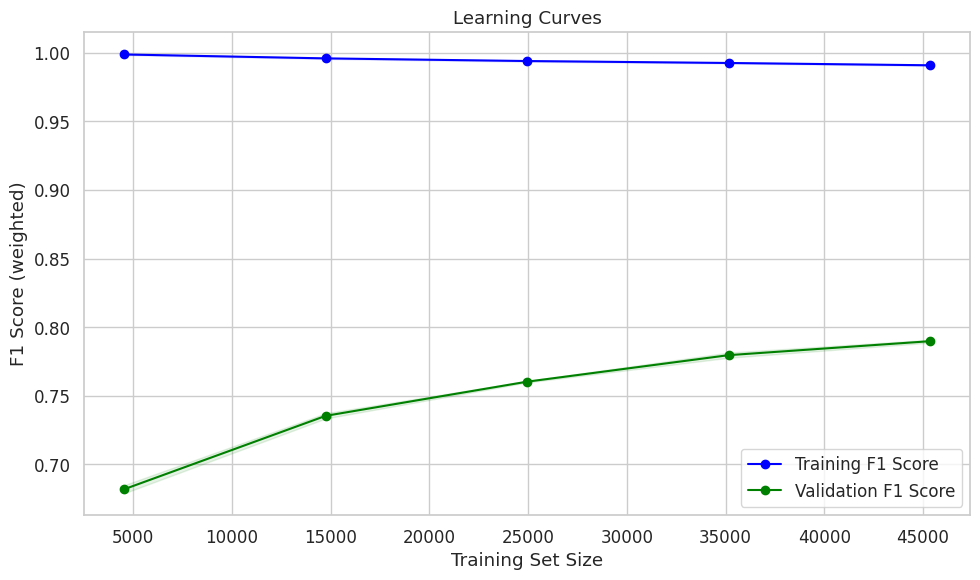

In [ ]:
base_model = RandomForestClassifier()
plot_learning_curves(base_model, X_train_final, y_train_encoded)


It clearly overfits the data since training F1 score doesn't drop.

## Random Forest Classifier Optimization

In [ ]:
#This function will be used to check for overfitting after optimizing the models
def overfitting_diagnostics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    table = PrettyTable()
    table.field_names = ["Metric", "Train", "Test", "Gap"]

    table.add_row(["Accuracy", f"{train_acc:.4f}", f"{test_acc:.4f}", f"{(train_acc - test_acc):.4f}"])
    table.add_row(["F1 Score", f"{train_f1:.4f}", f"{test_f1:.4f}", f"{(train_f1 - test_f1):.4f}"])

    print("Overfitting Diagnostic:")
    print(table)


In [ ]:
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

# Initialize base model
base_rf = RandomForestClassifier()


random_search = RandomizedSearchCV(
    estimator=base_rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1_weighted',
    cv=3,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train_final, y_train_encoded)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f44b41790d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f44b4149fd0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f44b4521ed0>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
#Base model metrics
base_rf.fit(X_train_final, y_train_encoded)
overfitting_diagnostics(base_rf, X_train_final, y_train_encoded, X_test_final, y_test_encoded)

Overfitting Diagnostic:
+----------+--------+--------+--------+
|  Metric  | Train  |  Test  |  Gap   |
+----------+--------+--------+--------+
| Accuracy | 0.9882 | 0.8115 | 0.1768 |
| F1 Score | 0.9882 | 0.8113 | 0.1770 |
+----------+--------+--------+--------+


In [ ]:
tuned1_rf = random_search.best_estimator_
overfitting_diagnostics(tuned1_rf, X_train_final, y_train_encoded, X_test_final, y_test_encoded)

Overfitting Diagnostic:
+----------+--------+--------+--------+
|  Metric  | Train  |  Test  |  Gap   |
+----------+--------+--------+--------+
| Accuracy | 0.9864 | 0.8101 | 0.1764 |
| F1 Score | 0.9864 | 0.8097 | 0.1768 |
+----------+--------+--------+--------+


We also see overfitting here. Lets try to regularize it.

In [ ]:
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [5, 10, 15],
    'min_samples_split': randint(10, 30),
    'min_samples_leaf': randint(5, 20),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

rf = RandomForestClassifier()

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='f1_weighted',
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_final, y_train_encoded)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f44b4064610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f44b40666d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f44b40d9590>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
tuned2_rf = random_search.best_estimator_
overfitting_diagnostics(tuned2_rf, X_train_final, y_train_encoded, X_test_final, y_test_encoded)

Overfitting Diagnostic:
+----------+--------+--------+--------+
|  Metric  | Train  |  Test  |  Gap   |
+----------+--------+--------+--------+
| Accuracy | 0.7543 | 0.7286 | 0.0257 |
| F1 Score | 0.7525 | 0.7266 | 0.0259 |
+----------+--------+--------+--------+


Now we regularized it really good as we see from the gap and the accuracy is not perfect but still very good.

Computing learning curves


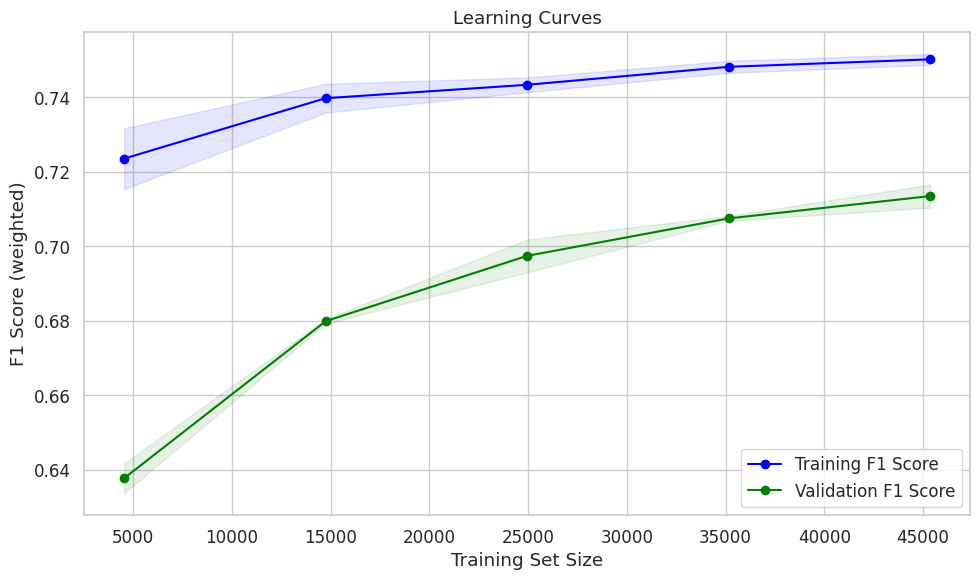

In [ ]:
plot_learning_curves(tuned2_rf, X_train_final, y_train_encoded)

In [ ]:
summary_rf_clf = pd.DataFrame({
    'Model Version': ['Initial Model', 'Tuned #1', 'Final Model'],
    'Train Accuracy': [0.9882,0.9864,0.7543],
    'Test Accuracy': [0.8115,0.8101,0.7286],
    'Train F1': [0.9882,0.9864,0.7525],
    'Test F1': [0.8113,0.8097,0.7266],
    'Accuracy Gap':[0.1768,0.1764,0.0257]
})

summary_rf_clf.style.set_caption("Random Forest Classifier Model Comparison")


## XGBClassifier Optimization

In [ ]:
xgb_base_model = XGBClassifier()
xgb_base_model.fit(X_train_final, y_train_encoded)
overfitting_diagnostics(xgb_base_model, X_train_final, y_train_encoded, X_test_final, y_test_encoded)

Overfitting Diagnostic:
+----------+--------+--------+--------+
|  Metric  | Train  |  Test  |  Gap   |
+----------+--------+--------+--------+
| Accuracy | 0.8304 | 0.7870 | 0.0435 |
| F1 Score | 0.8307 | 0.7872 | 0.0435 |
+----------+--------+--------+--------+


It performs really good even from the base model. We will try to optimize it's performance and close the gap(overfitting) as much as we can.


---



---



In [ ]:
from scipy.stats import randint, uniform
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'gamma': uniform(0, 0.3),
    'min_child_weight': randint(1, 10)
}


xgb_random_search = RandomizedSearchCV(
    estimator=xgb_base_model,
    param_distributions=param_dist,
    n_iter=15,
    scoring='f1_weighted',
    cv=3,
    random_state=42,
    n_jobs=-1
)


xgb_random_search.fit(X_train_final, y_train_encoded)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a2be811e150>,
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2be81310d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2be811e010>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a2bf5f9ba50>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
xgb_tune1 = xgb_random_search.best_estimator_
overfitting_diagnostics(xgb_tune1, X_train_final, y_train_encoded, X_test_final, y_test_encoded)


Overfitting Diagnostic:
+----------+--------+--------+--------+
|  Metric  | Train  |  Test  |  Gap   |
+----------+--------+--------+--------+
| Accuracy | 0.9123 | 0.8233 | 0.0889 |
| F1 Score | 0.9123 | 0.8236 | 0.0887 |
+----------+--------+--------+--------+


We have indeed increased the accuracy on the test set but now it tends to overfit, so we will regularize it now.


---



---



In [ ]:
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [3, 4, 5, 6],
    'learning_rate': uniform(0.01, 0.15),
    'subsample': uniform(0.7, 0.2),
    'colsample_bytree': uniform(0.7, 0.2),
    'gamma': uniform(0.1, 0.5),
    'min_child_weight': randint(3, 10),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(1, 5)
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_base_model,
    param_distributions=param_dist,
    n_iter=15,
    scoring='f1_weighted',
    cv=3,
    random_state=42,
    n_jobs=-1
)


xgb_random_search.fit(X_train_final, y_train_encoded)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a2bee917fd0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a2be8286590>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a2be8294d90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a2be8285f90>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
xgb_final = xgb_random_search.best_estimator_
overfitting_diagnostics(xgb_final, X_train_final, y_train_encoded, X_test_final, y_test_encoded)

Overfitting Diagnostic:
+----------+--------+--------+--------+
|  Metric  | Train  |  Test  |  Gap   |
+----------+--------+--------+--------+
| Accuracy | 0.7879 | 0.7653 | 0.0226 |
| F1 Score | 0.7882 | 0.7658 | 0.0224 |
+----------+--------+--------+--------+




---



---



In [ ]:
summary_xgb_clf = pd.DataFrame({
    'Model Version': ['Initial Model', 'Tuned #1', 'Final Model'],
    'Train Accuracy': [0.8304,0.9123, 0.7879],
    'Test Accuracy': [0.7870,0.8233 ,0.7653],
    'Train F1': [0.8307,0.9123,0.7882],
    'Test F1': [0.7872,0.8236,0.7658],
    'Accuracy Gap':[0.0435,0.0889,0.0226]
})

summary_xgb_clf.style.set_caption("XGB Classifier Model Comparison")

## Neural Networks - MLP Model

In [ ]:
#Split the data again for training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_final, y_clf_train)

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

In [ ]:
def summarize_mlp_classifier(model, X_train, y_train, X_valid, y_valid, X_test, y_test):

    # Predictions
    y_train_pred = model.predict(X_train).argmax(axis=1)
    y_valid_pred = model.predict(X_valid).argmax(axis=1)
    y_test_pred = model.predict(X_test).argmax(axis=1)

    # Metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_valid, y_valid_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    table = PrettyTable()
    table.title = "Neural Network Classification Performance"
    table.field_names = ["Metric", "Value"]
    table.align["Metric"] = "l"
    table.align["Value"] = "r"

    table.add_row(["Train Accuracy", f"{train_acc:.4f}"])
    table.add_row(["Validation Accuracy", f"{val_acc:.4f}"])
    table.add_row(["Test Accuracy", f"{test_acc:.4f}"])
    table.add_row(["Test F1 Score", f"{test_f1:.4f}"])

    print(table)

In [ ]:
#Let's build our base model



In [ ]:
base_model = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=X_train.shape[1:]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(3, activation="softmax") # Output layer with 3 outputs
])

base_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer="sgd",
                   metrics=["accuracy"])

history = base_model.fit(X_train, y_train_encoded, epochs=30,
                    validation_data=(X_valid, y_valid_encoded))


Epoch 1/30
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.4552 - loss: 1.0338 - val_accuracy: 0.5617 - val_loss: 0.9208
Epoch 2/30
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5746 - loss: 0.8999 - val_accuracy: 0.6030 - val_loss: 0.8440
Epoch 3/30
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6143 - loss: 0.8330 - val_accuracy: 0.6188 - val_loss: 0.8130
Epoch 4/30
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6233 - loss: 0.8089 - val_accuracy: 0.6300 - val_loss: 0.7973
Epoch 5/30
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6335 - loss: 0.7887 - val_accuracy: 0.6332 - val_loss: 0.7899
Epoch 6/30
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6426 - loss: 0.7783 - val_accuracy: 0.6387 - val_loss: 0.7774
Epoch 7/30
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6502 - loss: 0.7644 - val_accuracy: 0.6395 - val_loss: 0.7726
Epoch 8/30
1595/1595 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6505 - loss: 0.7617 -

In [ ]:
summarize_mlp_classifier(base_model, X_train, y_train_encoded, X_valid, y_valid_encoded, X_test_final, y_test_encoded)

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
+-------------------------------------------+
| Neural Network Classification Performance |
+------------------------------+------------+
| Metric                       |      Value |
+------------------------------+------------+
| Train Accuracy               |     0.7175 |
| Validation Accuracy          |     0.6882 |
| Test Accuracy                |     0.6943 |
| Test F1 Score                |     0.6814 |
+------------------------------+------------+


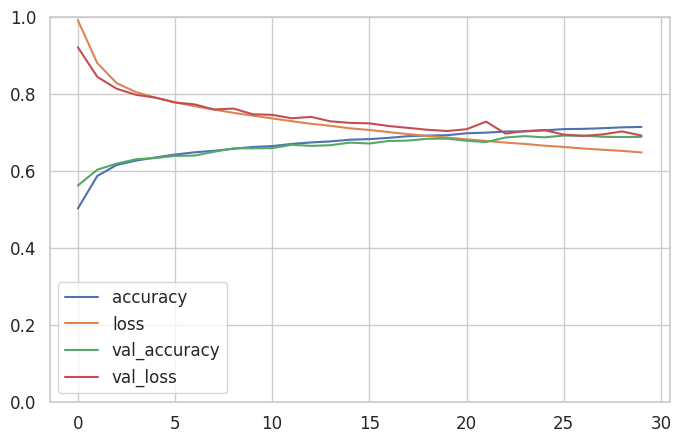

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


It does not overfit not performs badly, but we have to try and optimize it's accuracy.


---



---



In [ ]:
model_1 = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=X_train.shape[1:]),
        keras.layers.Dense(300, activation="relu"),
        Dropout(0,3),
        keras.layers.Dense(150, activation="relu"),
        keras.layers.Dense(3, activation="softmax") # Output layer with 3 outputs
])

#Change optimizer to Adam
model_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Early stop implementation
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model_1.fit(
    X_train, y_train_encoded,
    epochs=50,
    batch_size=128,
    validation_data=(X_valid, y_valid_encoded),
    callbacks=[early_stop]
)

Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5595 - loss: 0.9043 - val_accuracy: 0.6415 - val_loss: 0.7810
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6508 - loss: 0.7628 - val_accuracy: 0.6597 - val_loss: 0.7475
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6667 - loss: 0.7275 - val_accuracy: 0.6663 - val_loss: 0.7367
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6849 - loss: 0.7001 - val_accuracy: 0.6824 - val_loss: 0.7048
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7013 - loss: 0.6701 - val_accuracy: 0.6905 - val_loss: 0.6981
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7115 - loss: 0.6526 - val_accuracy: 0.6922 - val_loss: 0.6873
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7197 - loss: 0.6383 - val_accuracy: 0.6984 - val_loss: 0.6789
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7236 - loss: 0.6279 - val_accuracy: 0.

In [ ]:
summarize_mlp_classifier(model_1, X_train, y_train_encoded, X_valid, y_valid_encoded, X_test_final, y_test_encoded)


1595/1595 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
+-------------------------------------------+
| Neural Network Classification Performance |
+------------------------------+------------+
| Metric                       |      Value |
+------------------------------+------------+
| Train Accuracy               |     0.7793 |
| Validation Accuracy          |     0.7179 |
| Test Accuracy                |     0.7212 |
| Test F1 Score                |     0.7190 |
+------------------------------+------------+


The accuracy has increased but so did the overfitting. We will change back to sgd optimizer and add another layer.

In [ ]:

model_2 = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=X_train.shape[1:]),
        keras.layers.Dense(300, activation="relu"),
        Dropout(0,2),
        keras.layers.Dense(250, activation="relu"),
        keras.layers.Dense(200, activation="relu"),
        keras.layers.Dense(3, activation="softmax") # Output layer with 3 outputs
])


model_2.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

history = model_2.fit(
    X_train, y_train_encoded,
    epochs=100,
    batch_size=128,
    validation_data=(X_valid, y_valid_encoded),
    callbacks=[early_stop]
)


Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4134 - loss: 1.0722 - val_accuracy: 0.4785 - val_loss: 1.0164
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4872 - loss: 1.0078 - val_accuracy: 0.5237 - val_loss: 0.9707
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5325 - loss: 0.9602 - val_accuracy: 0.5585 - val_loss: 0.9250
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5647 - loss: 0.9152 - val_accuracy: 0.5828 - val_loss: 0.8833
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5890 - loss: 0.8783 - val_accuracy: 0.5982 - val_loss: 0.8528
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6015 - loss: 0.8467 - val_accuracy: 0.6092 - val_loss: 0.8346
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6150 - loss: 0.8270 - val_accuracy: 0.6157 - val_loss: 0.8241
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6200 - loss: 0.8145 - val_acc

In [ ]:
summarize_mlp_classifier(model_2, X_train, y_train_encoded, X_valid, y_valid_encoded, X_test_final, y_test_encoded)

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
+-------------------------------------------+
| Neural Network Classification Performance |
+------------------------------+------------+
| Metric                       |      Value |
+------------------------------+------------+
| Train Accuracy               |     0.7558 |
| Validation Accuracy          |     0.7095 |
| Test Accuracy                |     0.7170 |
| Test F1 Score                |     0.7160 |
+------------------------------+------------+


In [ ]:
model_3 = keras.models.Sequential([
        keras.layers.InputLayer(input_shape=X_train.shape[1:]),
        keras.layers.Dense(300, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dense(300, activation="relu"),
        Dropout(0,35),
        keras.layers.Dense(3, activation="softmax") # Output layer with 3 outputs
])

model_3.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.003),  # Nadam optimizer
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model_3.fit(
    X_train, y_train_encoded,
    epochs=60,
    batch_size=128,
    validation_data=(X_valid, y_valid_encoded),
    callbacks=[early_stop]
)

Epoch 1/60
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5812 - loss: 0.9121 - val_accuracy: 0.6512 - val_loss: 0.7871
Epoch 2/60
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6686 - loss: 0.7649 - val_accuracy: 0.6674 - val_loss: 0.7593
Epoch 3/60
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6821 - loss: 0.7338 - val_accuracy: 0.6785 - val_loss: 0.7454
Epoch 4/60
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6882 - loss: 0.7204 - val_accuracy: 0.6871 - val_loss: 0.7257
Epoch 5/60
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6994 - loss: 0.7045 - val_accuracy: 0.6887 - val_loss: 0.7254
Epoch 6/60
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7004 - loss: 0.7022 - val_accuracy: 0.6909 - val_loss: 0.7226
Epoch 7/60
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7071 - loss: 0.6906 - val_accuracy: 0.6971 - val_loss: 0.7141
Epoch 8/60
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7111 - loss: 0.6817 - val_accuracy: 0

In [ ]:
summarize_mlp_classifier(model_3, X_train, y_train_encoded, X_valid, y_valid_encoded, X_test_final, y_test_encoded)

1595/1595 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
+-------------------------------------------+
| Neural Network Classification Performance |
+------------------------------+------------+
| Metric                       |      Value |
+------------------------------+------------+
| Train Accuracy               |     0.7498 |
| Validation Accuracy          |     0.7131 |
| Test Accuracy                |     0.7161 |
| Test F1 Score                |     0.7137 |
+------------------------------+------------+


In [ ]:
summary_mlp_clf = pd.DataFrame({
    'Model Version': ['Initial Model', 'Model 1', 'Model 2', 'Final Model'],
    'Train Accuracy': [0.7175, 0.7793, 0.7558, 0.7498],
    'Validation Accuracy': [0.6882, 0.7179, 0.7095, 0.7131],
    'Test Accuracy': [0.6943, 0.7212, 0.7170, 0.7161],
    'Train F1': [0.6814, 0.7190, 0.7160, 0.7137],
    'Test F1': [0.6814, 0.7190, 0.7160, 0.7137],
    'Accuracy Gap': [
        0.7175 - 0.6943,
        0.7793 - 0.7212,
        0.7558 - 0.7170,
        0.7498 - 0.7161
    ]
})

summary_mlp_clf.style.set_caption("Neural Network Classifier Comparison")



---



---



## Final Summary of the Models

In [ ]:
final_classifiers = pd.DataFrame({
    'Model Type': ['Neural Network', 'XGBoost', 'Random Forest'],
    'Model Version': ['Final Model', 'Final Model', 'Final Model'],
    'Train Accuracy': [0.7498, 0.7879, 0.7543],
    'Test Accuracy': [0.7161, 0.7653, 0.7286],
    'Train F1': [0.7137, 0.7882, 0.7525],
    'Test F1': [0.7137, 0.7658, 0.7266],
    'Accuracy Gap': [0.0337, 0.0226, 0.0257]
})

final_classifiers.style.set_caption("Final Classifier Model Comparison")


We can see that XGBoost performs the best. Let's do an Error Analysis on this now.

## Error Analysis

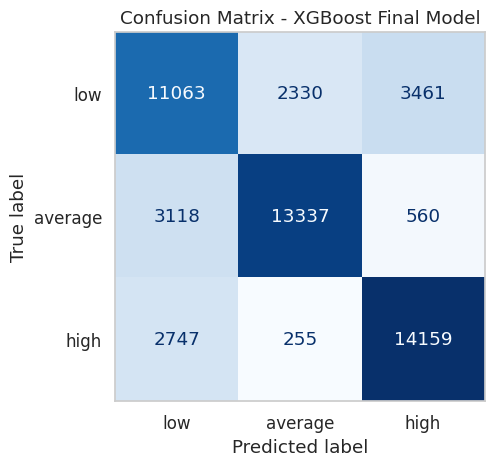

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(xgb_final,X_train,y_train_encoded,cv=3)

cm = confusion_matrix(y_train_encoded, y_train_pred, labels=[0, 1, 2])  # 0=low, 1=average, 2=high
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "average", "high"])
disp.plot(cmap="Blues",colorbar=False)
plt.grid(False)
plt.title("Confusion Matrix - XGBoost Final Model")
plt.show()

The confusion matrix looks good, since most classes are on the main diagonal. The "low" class looks not that dark blue like the other classes, which could mean that the classifier doesn't perform that well in that class.
1. "Low" is often confused with "High"
2. "Average" is the most stable class
3. "High" is mostly accurate
